Analysis code for

# Prevalence and moderators of apathy after traumatic brain injury: a systematic review and meta-analysis

In [39]:
# Load the libraries
library(dplyr)
library(readxl)
library(meta)
library(dmetar)
library(ggplot2)
library(metafor)

# Note: the dmetar package is not available on CRAN.
# Install instructions from github here: https://dmetar.protectlab.org/

Load data file

In [2]:
# Define the data directory path
data_dir <- "/home/main/data/"

# Load the data into main_df
main_df <- read_excel(paste(data_dir, "Lynch_et_al_data.xlsx", sep = ""), sheet = "Sheet1")

# Copy main_df to working_df
working_df <- main_df

New names:
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`


Data cleaning and variable typing

In [3]:
# Handle "NA" in all variables for missing data
main_df <- main_df %>%
  mutate(across(everything(), ~ifelse(. == "NA", NA, .)))

# Ensure all relevant columns are numeric.
main_df$`Gender_males` <- as.numeric(main_df$`Gender_males`)
main_df$`Cause_of_TBI_transport_accident` <- as.numeric(main_df$`Cause_of_TBI_transport_accident`)
main_df$`Cause_of_TBI_fall` <- as.numeric(main_df$`Cause_of_TBI_fall`)
main_df$`Cause_of_TBI_assault` <- as.numeric(main_df$`Cause_of_TBI_assault`)
main_df$`Cause_of_TBI_combat` <- as.numeric(main_df$`Cause_of_TBI_combat`)
main_df$`Cause_of_TBI_other` <- as.numeric(main_df$`Cause_of_TBI_other`)
main_df$`Mild` <- as.numeric(main_df$`Mild`)
main_df$`Moderate_severe` <- as.numeric(main_df$`Moderate_severe`)
main_df$`Severe` <- as.numeric(main_df$`Severe`)
main_df$`Length_of_time_since_TBI` <- as.numeric(main_df$`Length_of_time_since_TBI`)
main_df$`%_non_white_participants` <- as.numeric(main_df$`%_non_white_participants`)
main_df$'Study_quality_score' <- as.numeric(main_df$'Study_quality_score')
main_df$Mean_age <- as.numeric(main_df$Mean_age)

# Categorical variables
main_df$Continent <- as.factor(main_df$Continent)
main_df$Population <- as.factor(main_df$Population)
main_df$Setting <- as.factor(main_df$Setting)
main_df$Number_of_TBI <- as.factor(main_df$Number_of_TBI)
main_df$Cause_of_TBI_reported <- as.factor(main_df$Cause_of_TBI_reported)
main_df$Rater <- as.factor(main_df$Rater)
main_df$Country <- as.factor(main_df$Country)
main_df$Study_design <- as.factor(main_df$Study_design)
main_df$Apathy_measure <- as.factor(main_df$Apathy_measure)

# Clean character columns by removing extra spaces or special characters
main_df$Authors <- trimws(main_df$Authors)
main_df$Country <- trimws(main_df$Country)  

# Rename the relevant columns 
main_df <- main_df %>%
  rename(Total_N = `Total_participants_with_TBI`,
         Apathy_N = `Frequency_of_apathy`)

main_df$Total_N <- as.numeric(main_df$Total_N)
main_df$Apathy_N <- as.numeric(main_df$Apathy_N)

## Round up decimal values as needed for metaprop 
# Identify non-integer values
non_integer_apathy <- main_df %>% filter(Apathy_N != floor(Apathy_N))
non_integer_total <- main_df %>% filter(Total_N != floor(Total_N))
# Display the problematic rows
#non_integer_apathy
#non_integer_total

# Rounding the values to remove decimals (as needed for metaprop)
main_df$Apathy_N <- round(main_df$Apathy_N)
main_df$Total_N <- round(main_df$Total_N)

Run main meta-analysis

In [4]:
apathy_meta <- metaprop(Apathy_N, Total_N,
                        studlab = Authors,  
                        sm = "PFT",          
                        method.tau = "DL",   
                        method.cs = "WS",    
                        data = main_df)      

Text summary of meta-analysis

In [5]:
summary(apathy_meta)

                         proportion           95%-CI %W(common) %W(random)
Venkatesan & Rabinowitz      0.5000 [0.4013; 0.5987]        9.3        5.9
Nguyen et al                 0.6133 [0.4938; 0.7236]        6.6        5.8
Quang et al                  0.4444 [0.2964; 0.6000]        4.0        5.5
Ubukata et al                0.5795 [0.4695; 0.6840]        7.7        5.9
Balan et al                  0.2927 [0.1613; 0.4554]        3.6        5.4
Devi et al                   0.1000 [0.0333; 0.2181]        4.4        5.6
Huang et al                  0.0400 [0.0010; 0.2035]        2.2        5.0
Nygren DeBoussard et al      0.3210 [0.2215; 0.4340]        7.1        5.8
Arnould et al                0.2059 [0.1174; 0.3212]        6.0        5.7
Lengenfelder et al           0.3636 [0.2040; 0.5488]        2.9        5.3
Knutson et al                0.1591 [0.1084; 0.2217]       15.4        6.1
Wiart et al                  0.4255 [0.2826; 0.5782]        4.1        5.5
Lane-Brown & Tate        

Forest plot

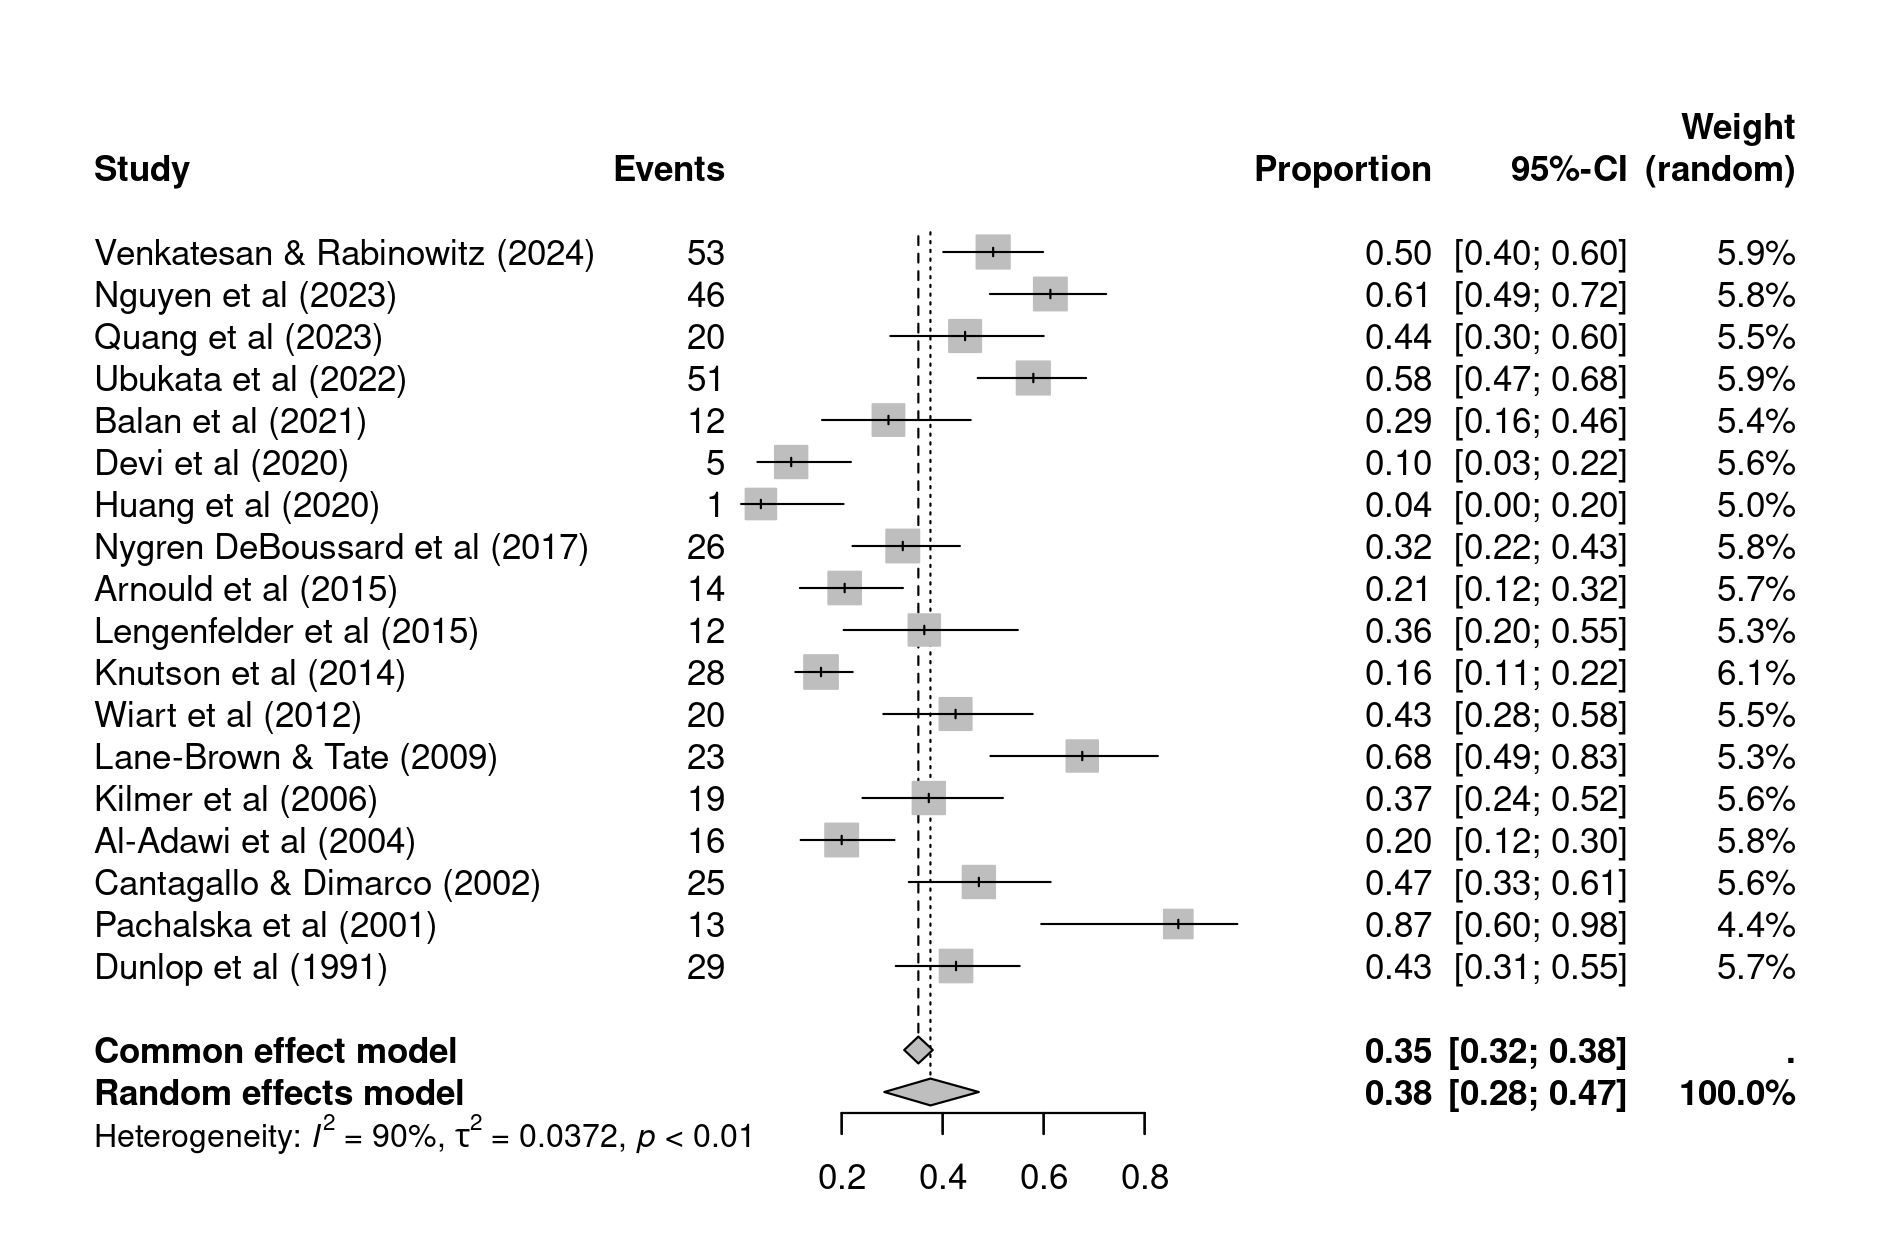

In [40]:
# Set image size
options(repr.plot.width=9, repr.plot.height=6, repr.plot.res = 210)

# Prepare labels for the left column
study_labels <- paste(apathy_meta$data$Authors, "(", apathy_meta$data$Year, ")", sep = "")

# Forest plot
forest(
  apathy_meta,
  studlab = study_labels,               # Use Authors (Year) as labels
  weight = "random",                    # Display random effects weights only
  leftcols = c("studlab", "event"),     # Columns for authors and events
  rightcols = c("effect", "ci", "w.random"), # Columns for effect size, CI, and random weights
  digits = 2)

### Subgroup analyses

Study design

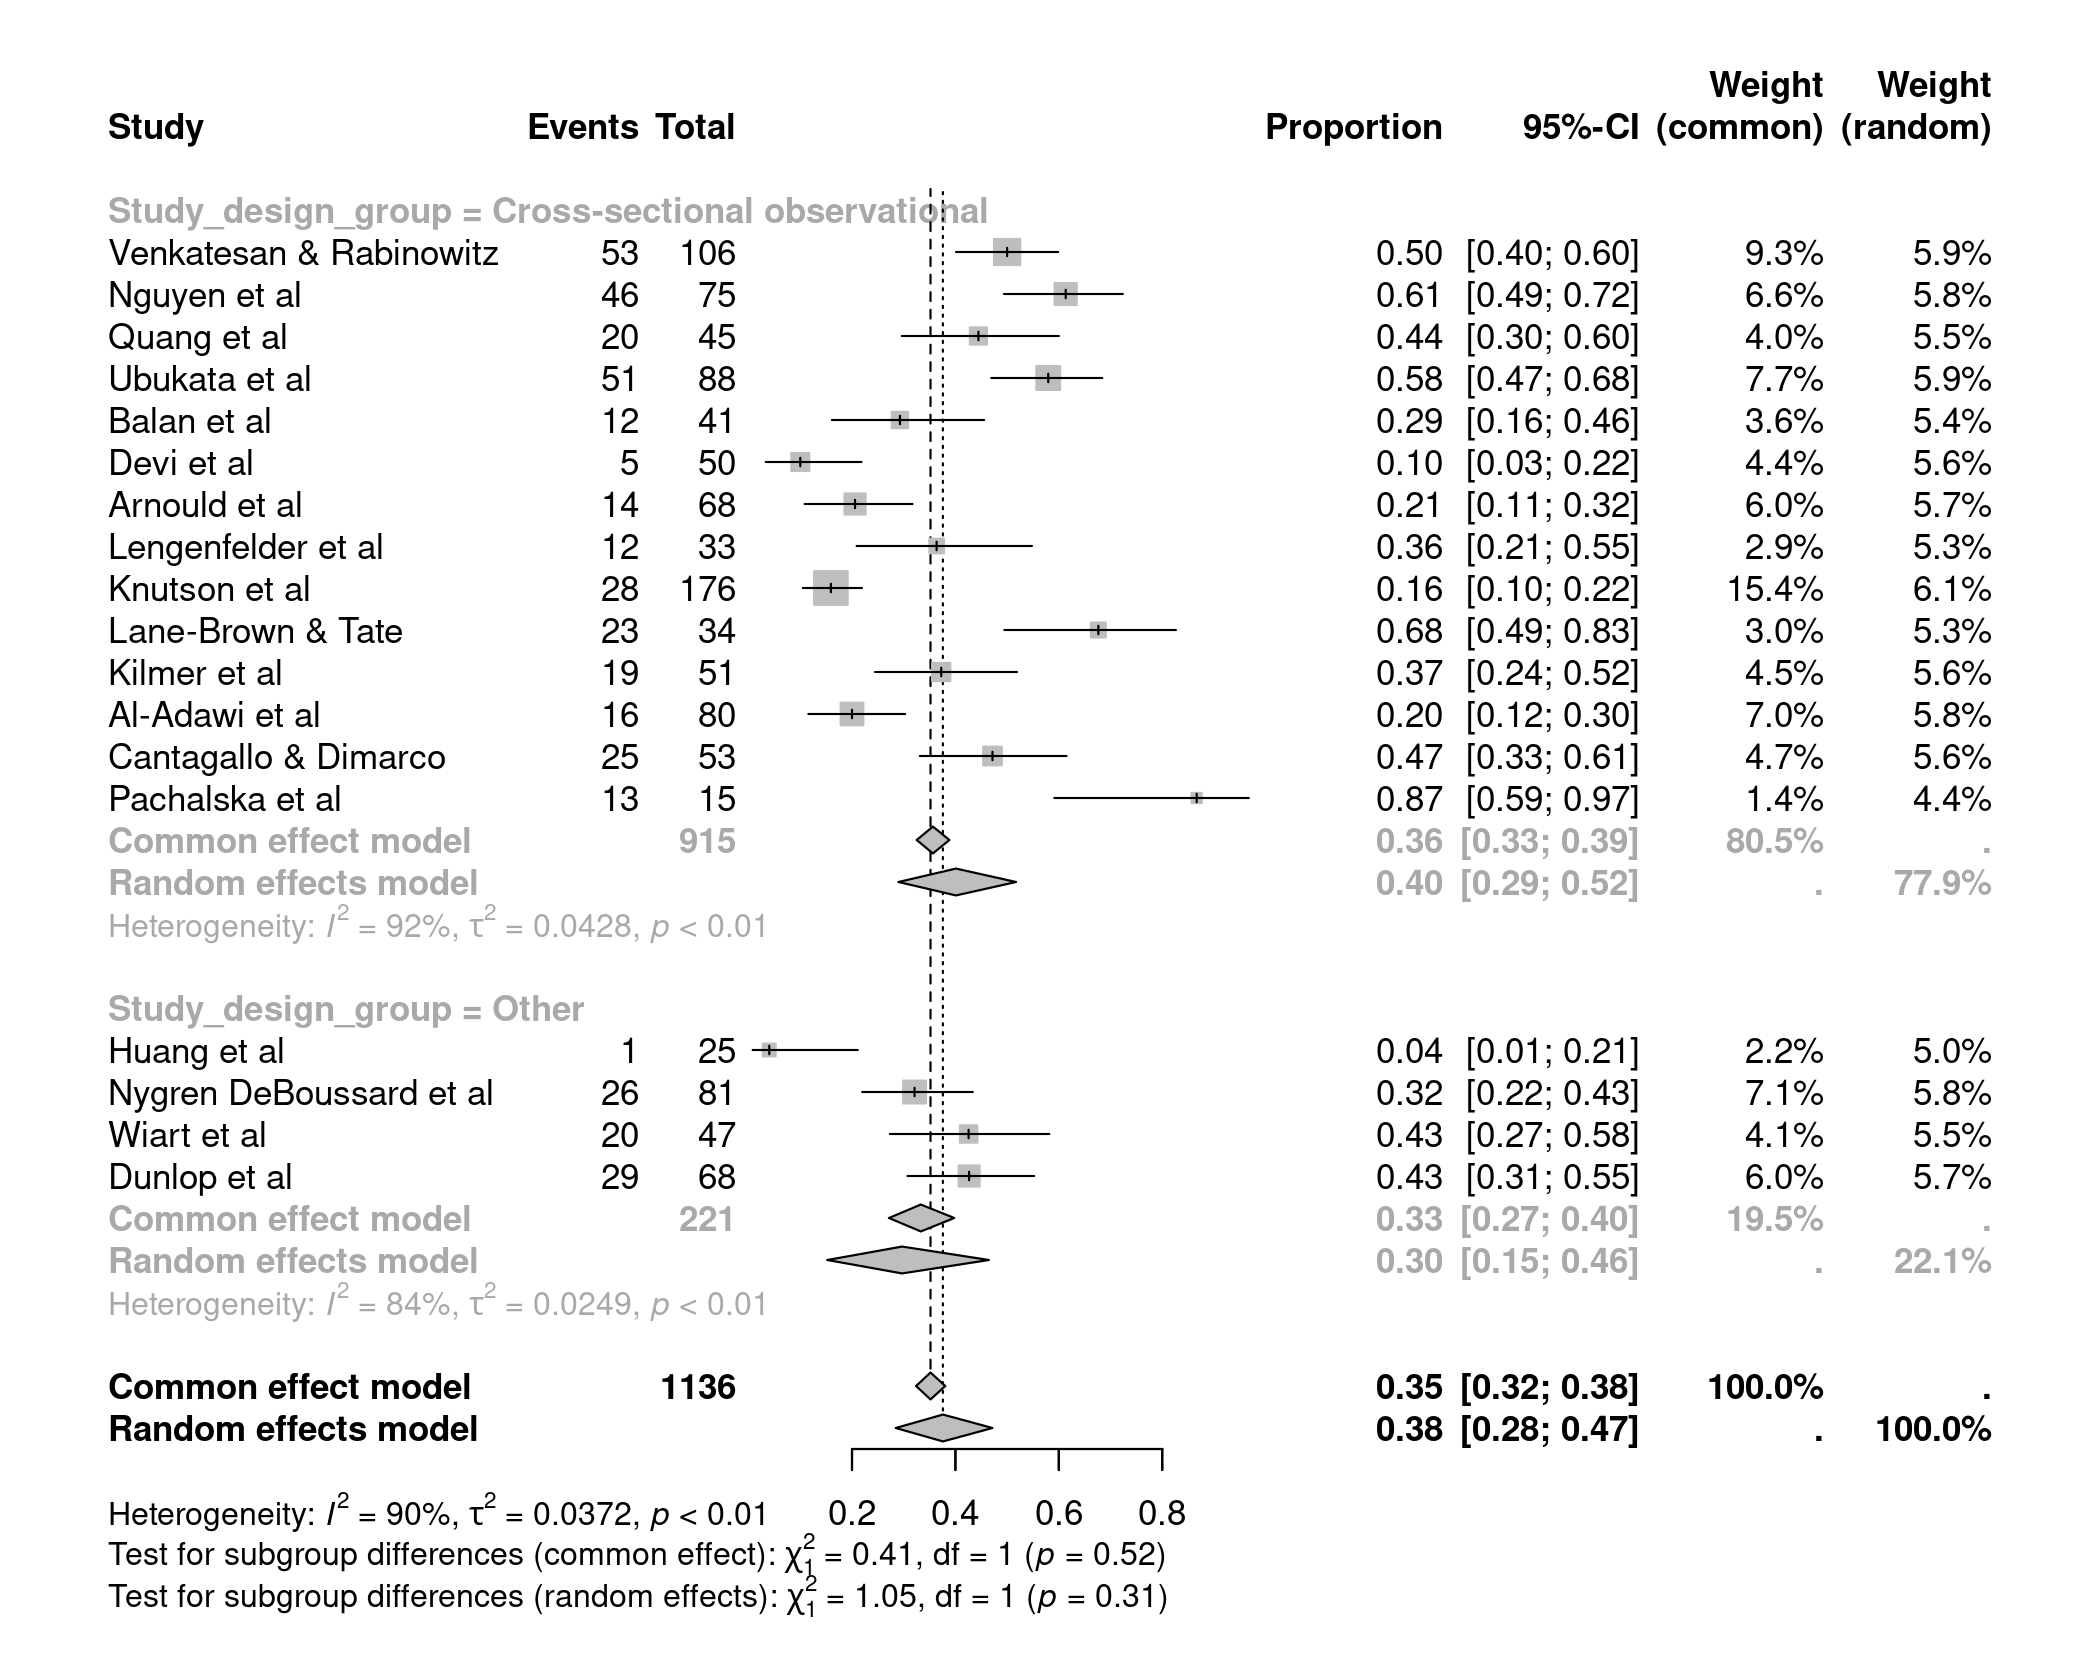

In [7]:
main_df$Study_design_group <- ifelse(main_df$Study_design == "Cross-sectional observational",
    "Cross-sectional observational",
    "Other"
)

# Perform a subgroup analysis for Study_design_group
study_design_meta <- metaprop(
    Apathy_N, Total_N,
    studlab = Authors,
    subgroup = Study_design_group,
    sm = "PFT",
    method.tau = "DL",
    method.cs = "WS",
    data = main_df
)

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 210)
forest(study_design_meta)

Setting

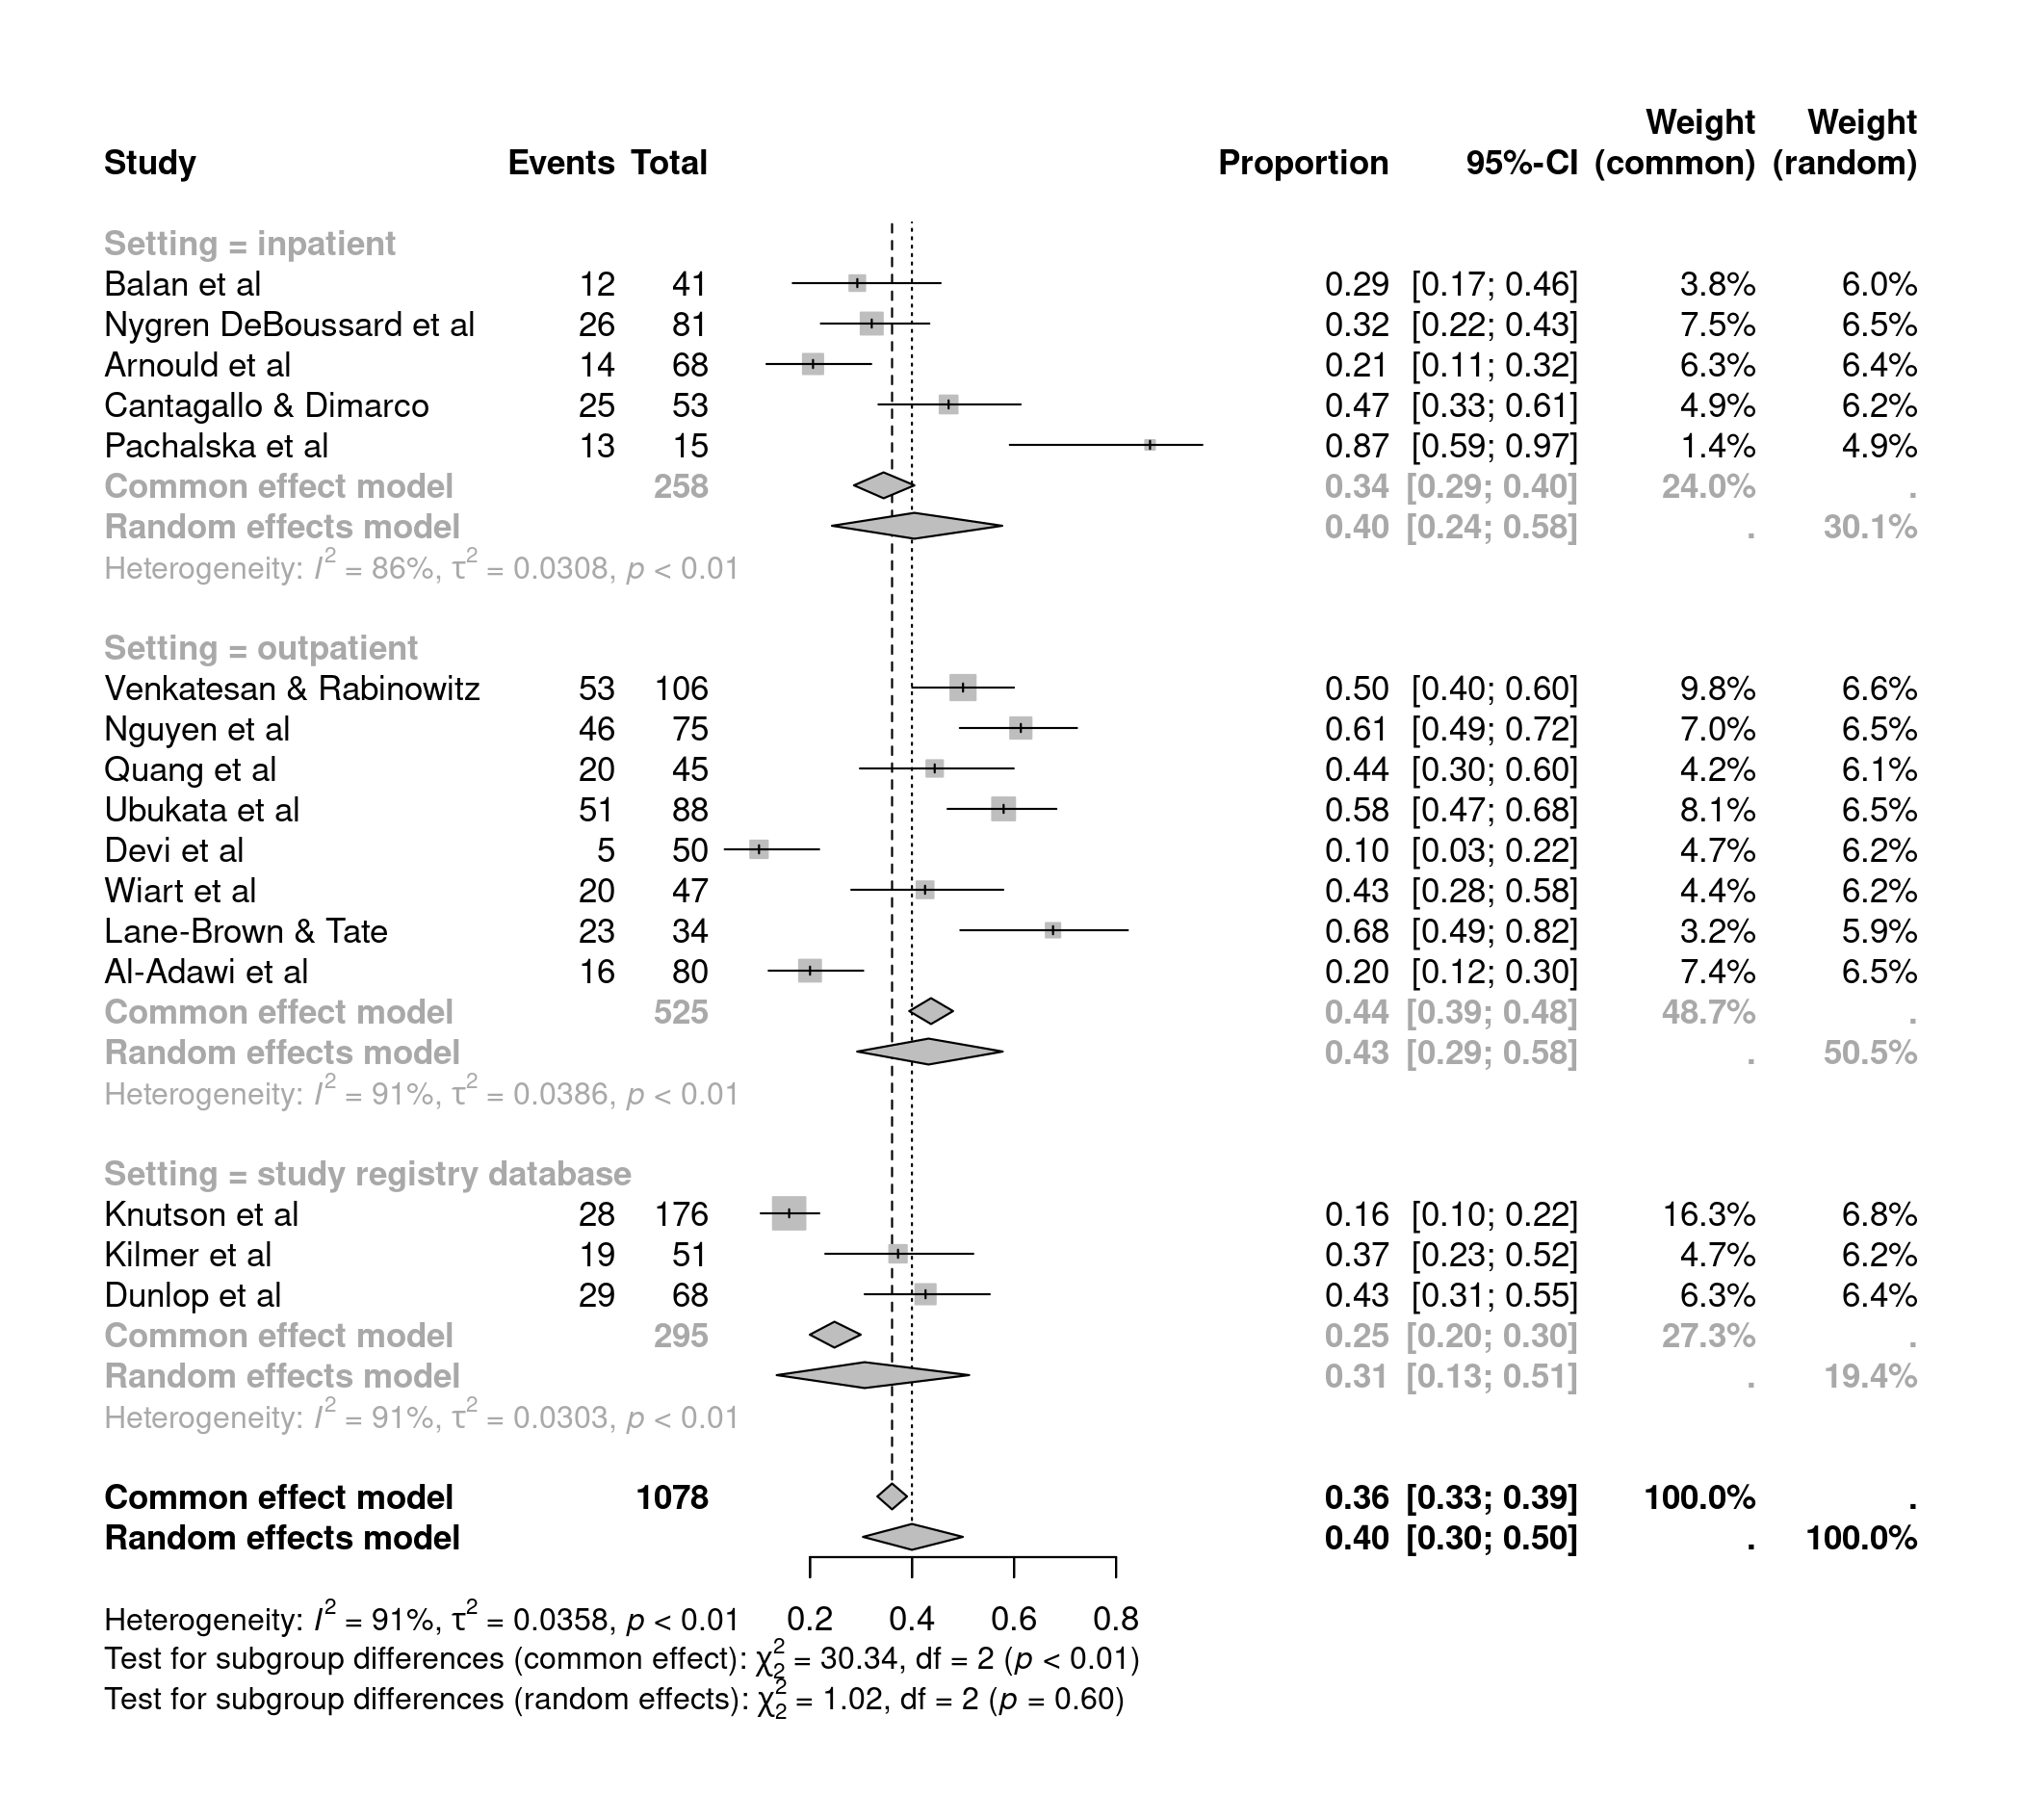

In [8]:
# Filter the data to remove rows with missing values in the 'Setting' column
main_df_filtered <- main_df %>%
  filter(!is.na(Setting))

# Run the meta-analysis on the filtered data
setting_meta <- metaprop(Apathy_N, Total_N,
                         studlab = Authors,
                         subgroup = Setting,  
                         sm = "PFT",          
                         method.tau = "DL",   
                         method.cs = "WS",    
                         data = main_df_filtered) 

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 210)
forest(setting_meta)

Population

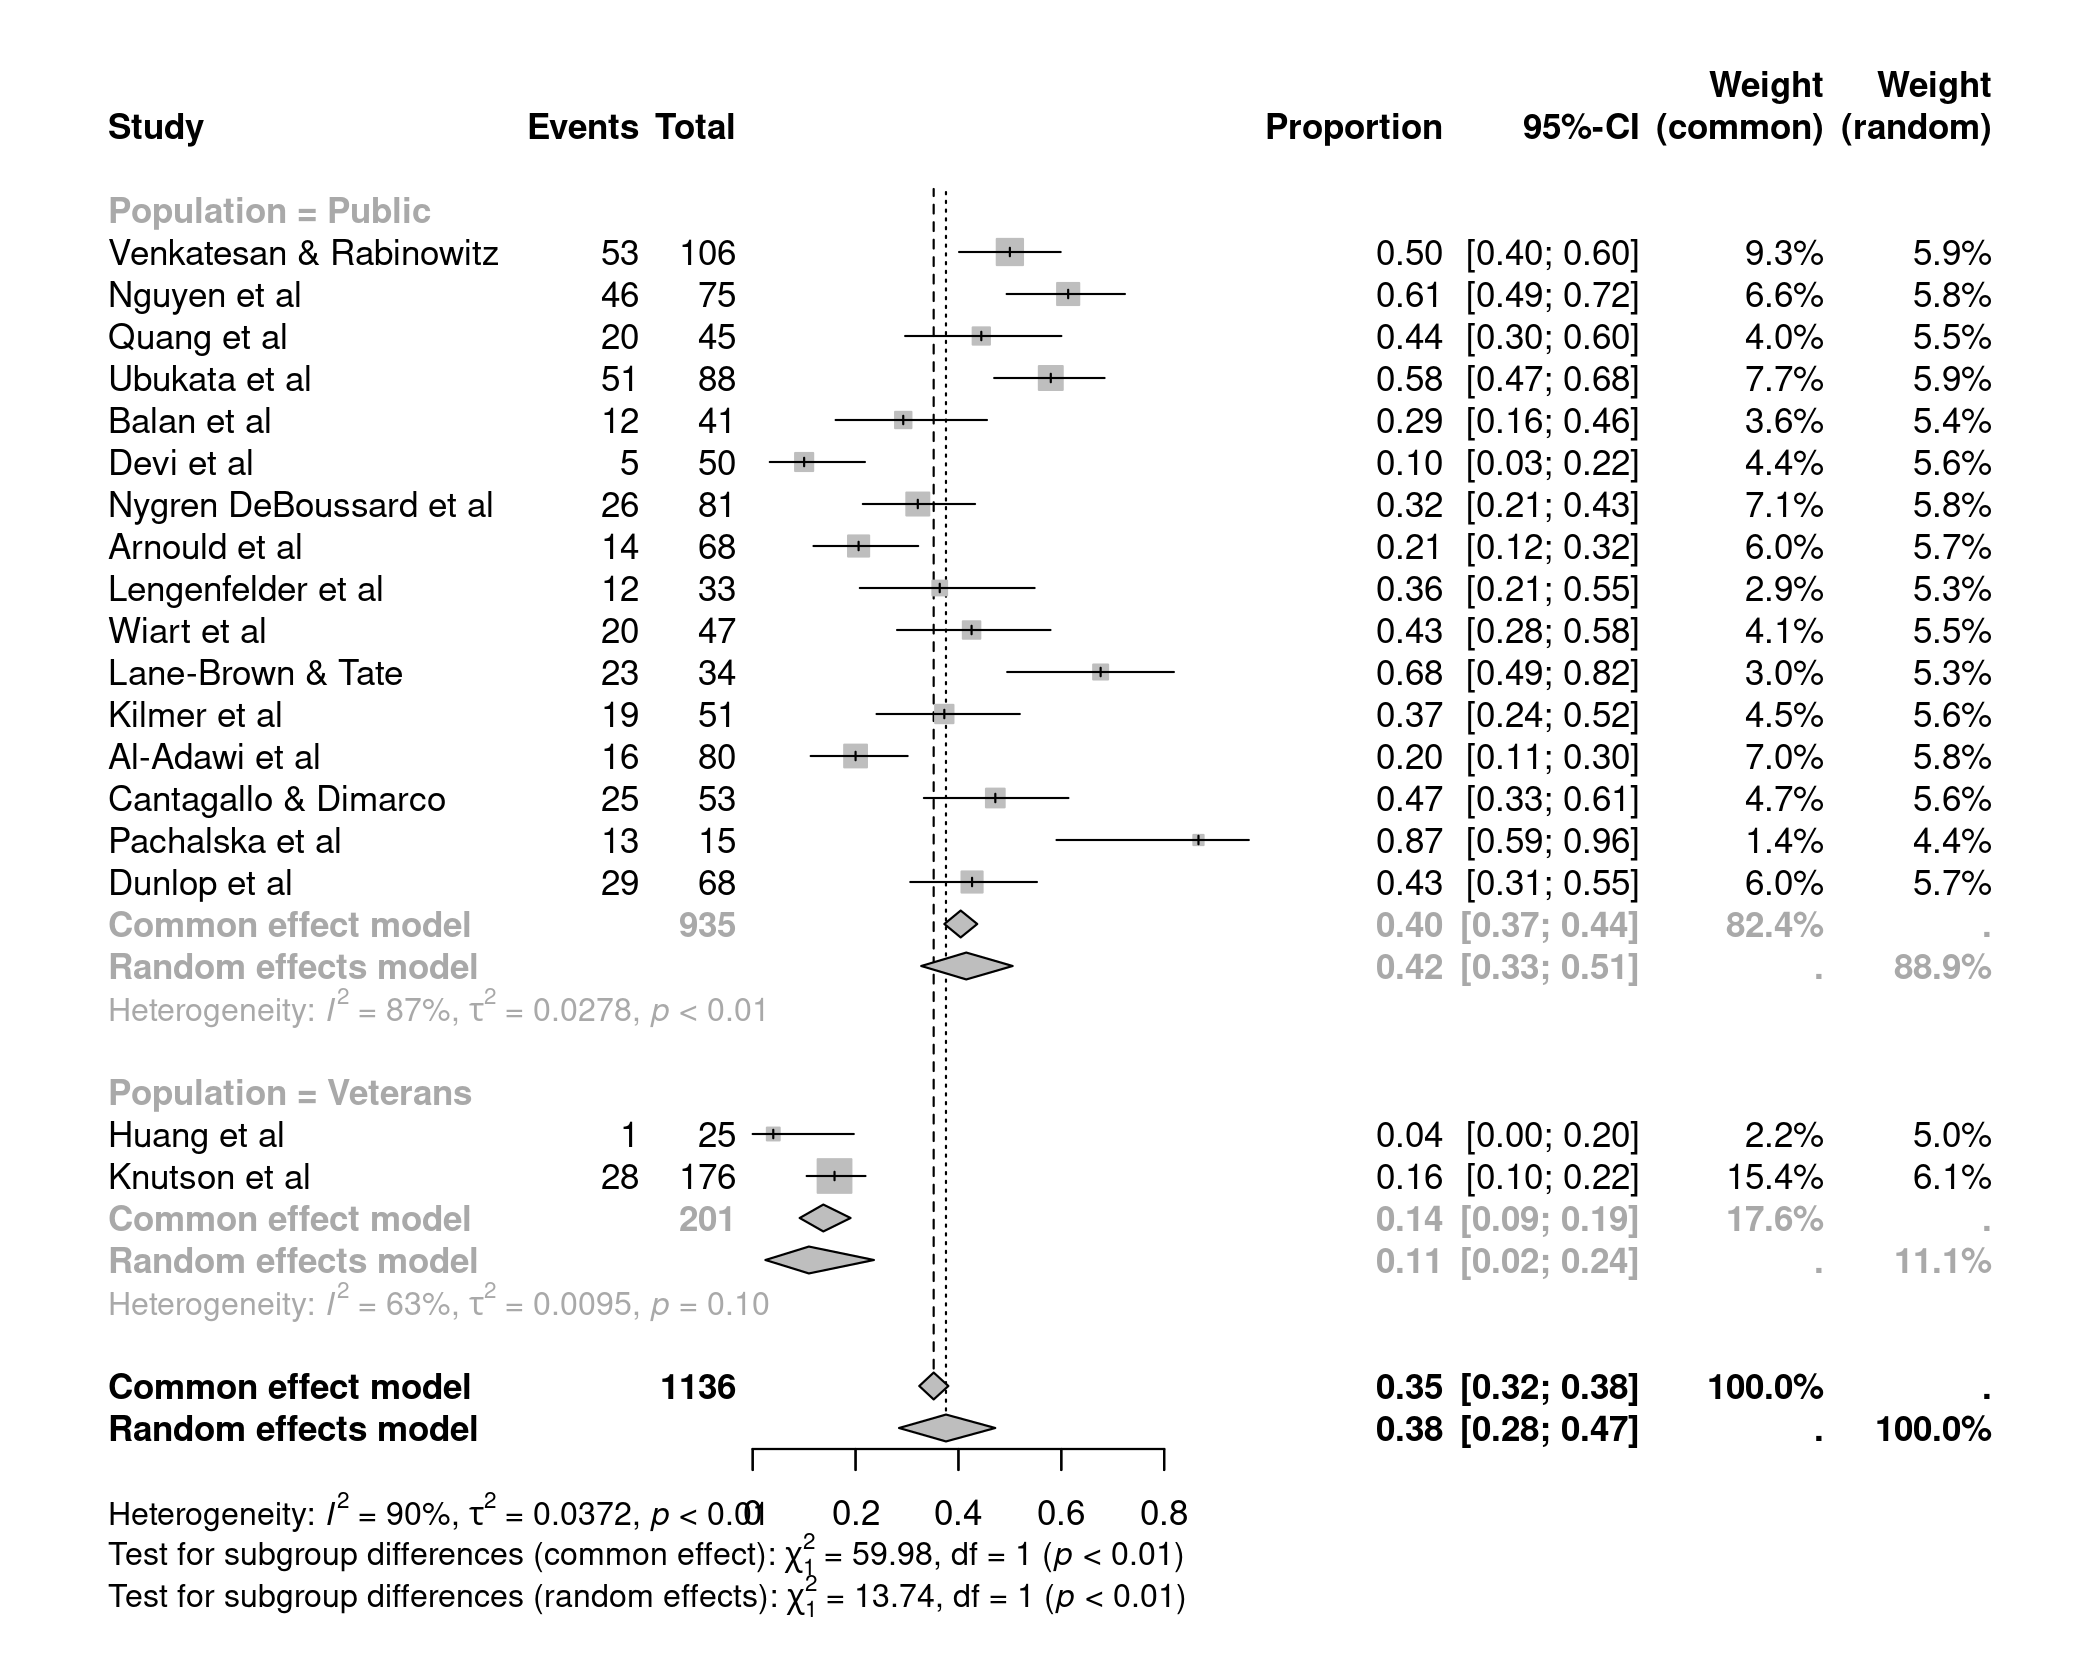

In [9]:
population_meta <- metaprop(Apathy_N, Total_N,
                            studlab = Authors,
                            subgroup = Population,  
                            sm = "PFT",            
                            method.tau = "DL",     
                            method.cs = "WS",      
                            data = main_df)        

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 210)
forest(population_meta)

Apathy measure

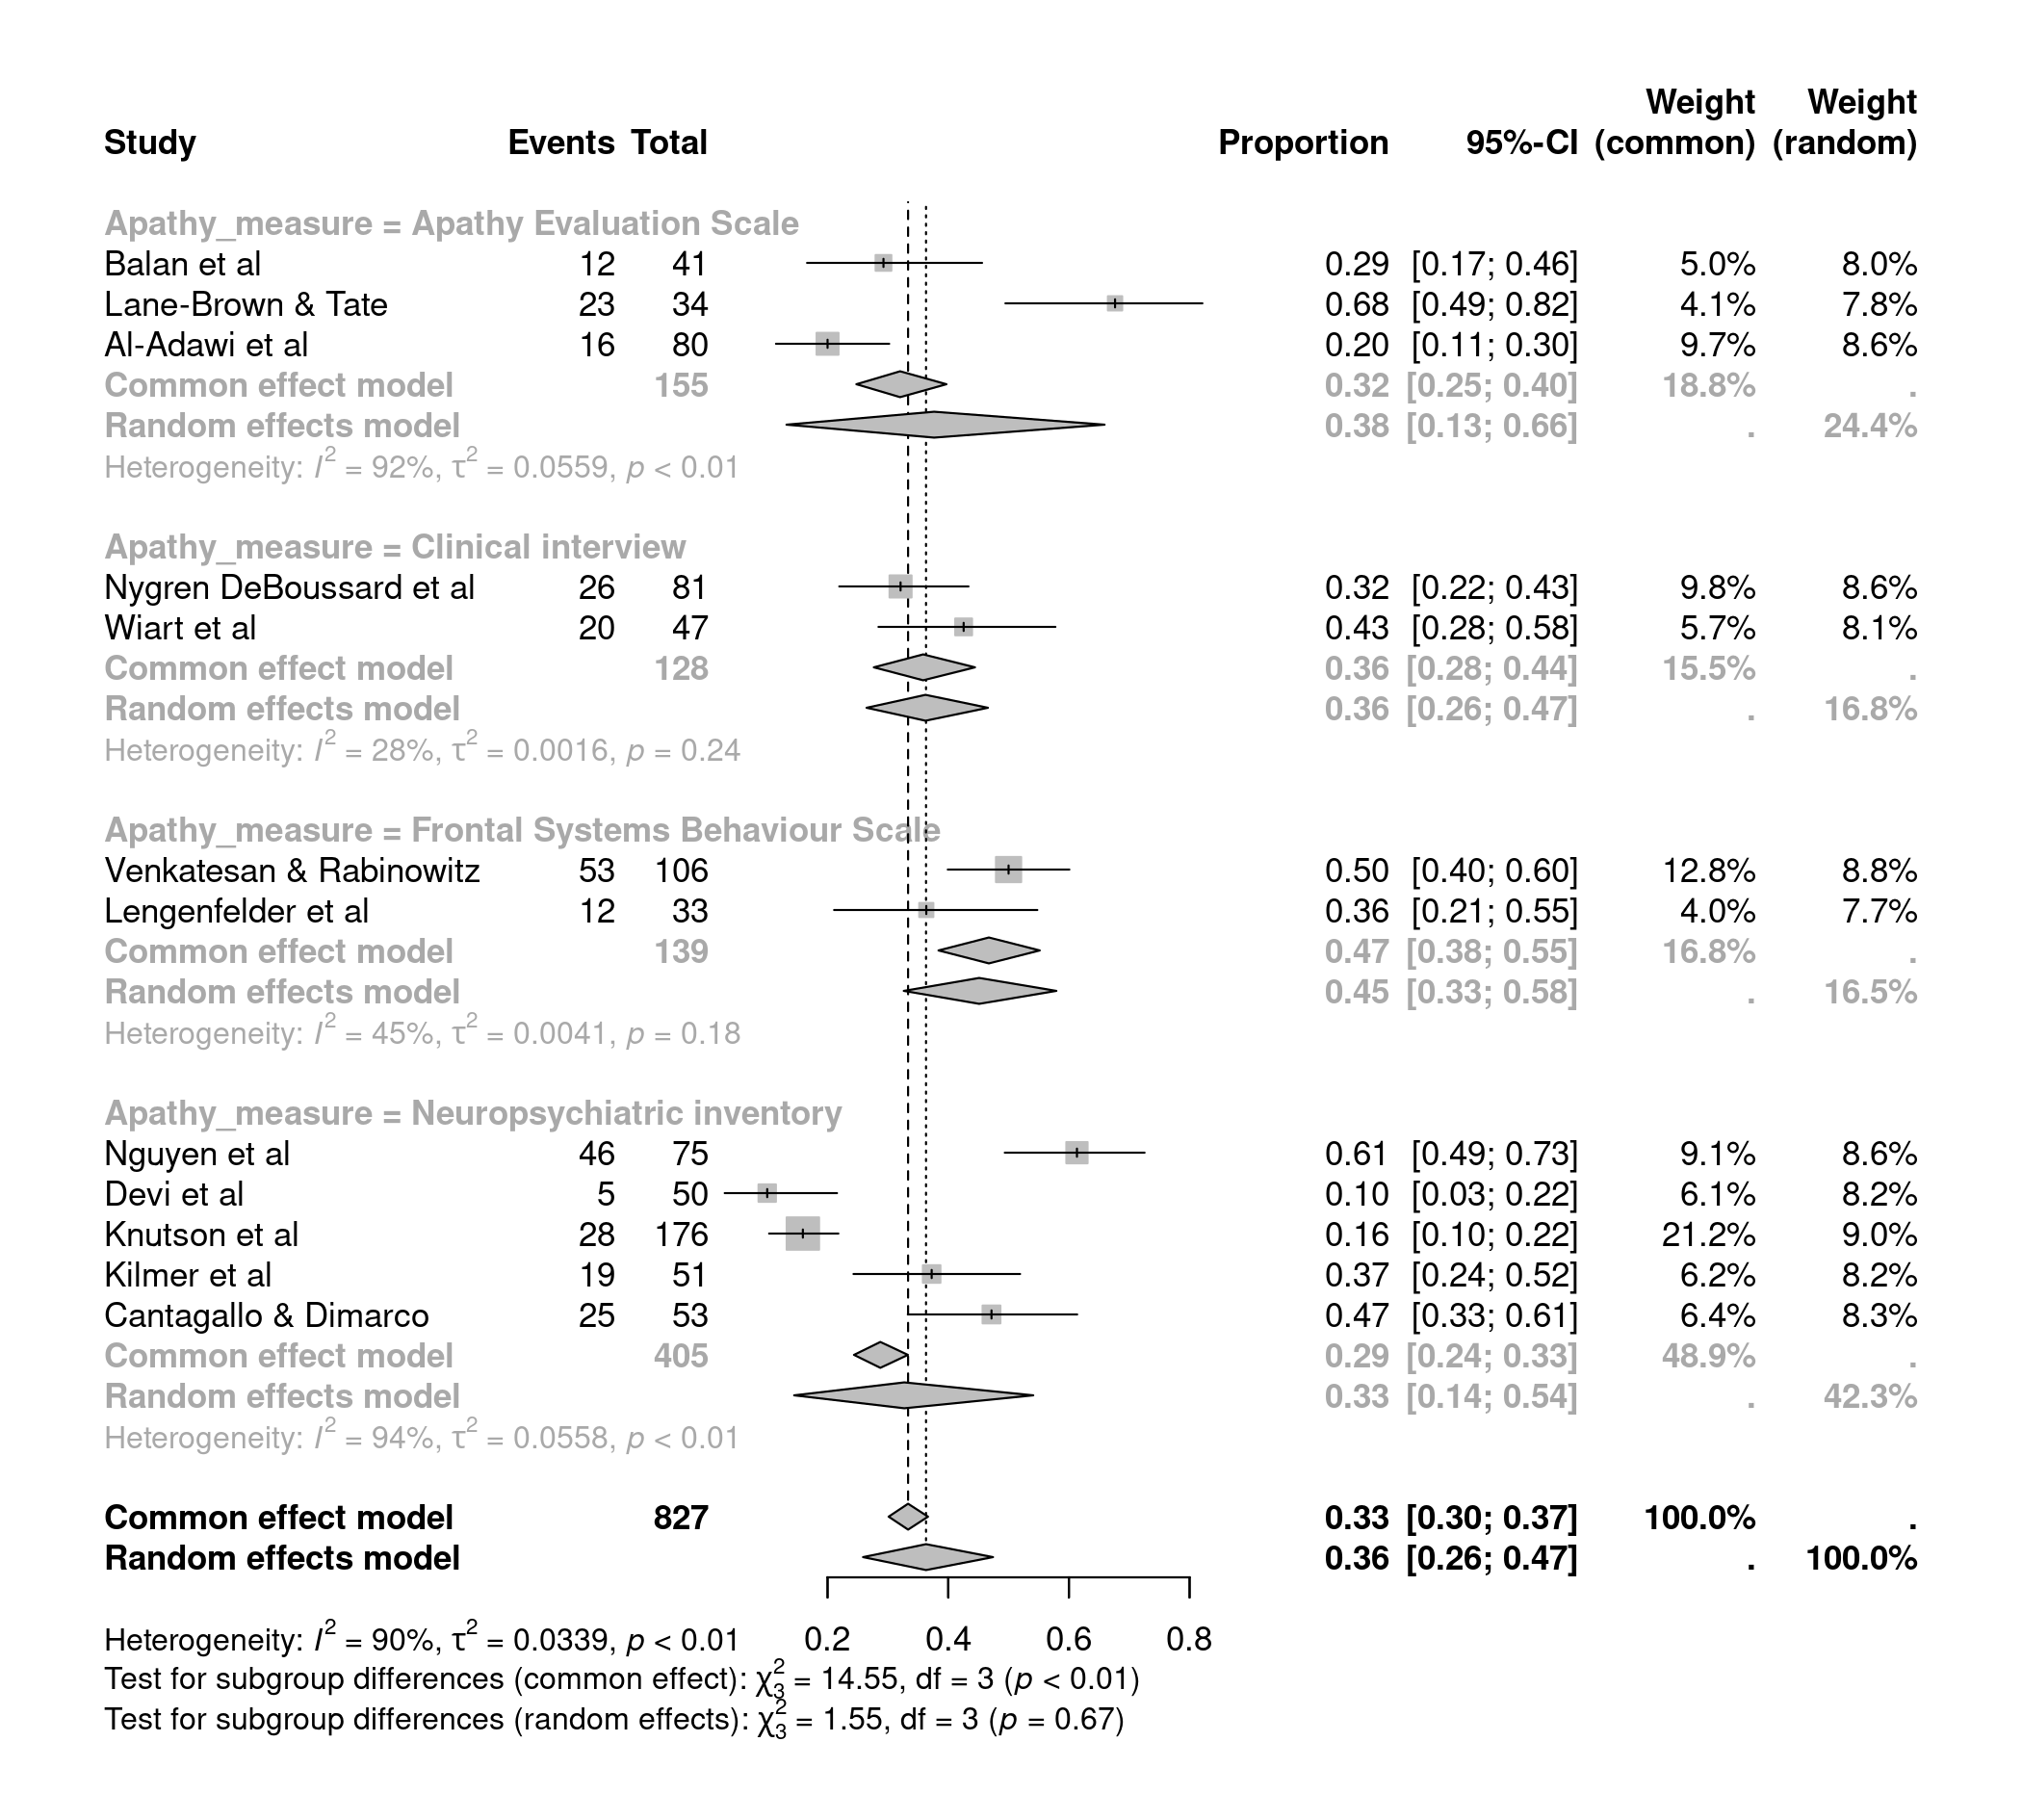

In [10]:
# Summarise the count of studies per apathy measure
measure_counts <- table(main_df$Apathy_measure)

# Identify measures with more than 1 study
valid_measures <- names(measure_counts[measure_counts > 1])

# Subset the dataset to include only those measures with more than 1 study
filtered_df <- main_df[main_df$Apathy_measure %in% valid_measures, ]

# Run the meta-analysis for the filtered dataset
apathy_measure_meta <- metaprop(Apathy_N, Total_N,
                                studlab = Authors,
                                subgroup = Apathy_measure,  
                                sm = "PFT",          
                                method.tau = "DL",   
                                method.cs = "WS",    
                                data = filtered_df)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 210)
forest(apathy_measure_meta)

Validated vs unvalidated measures

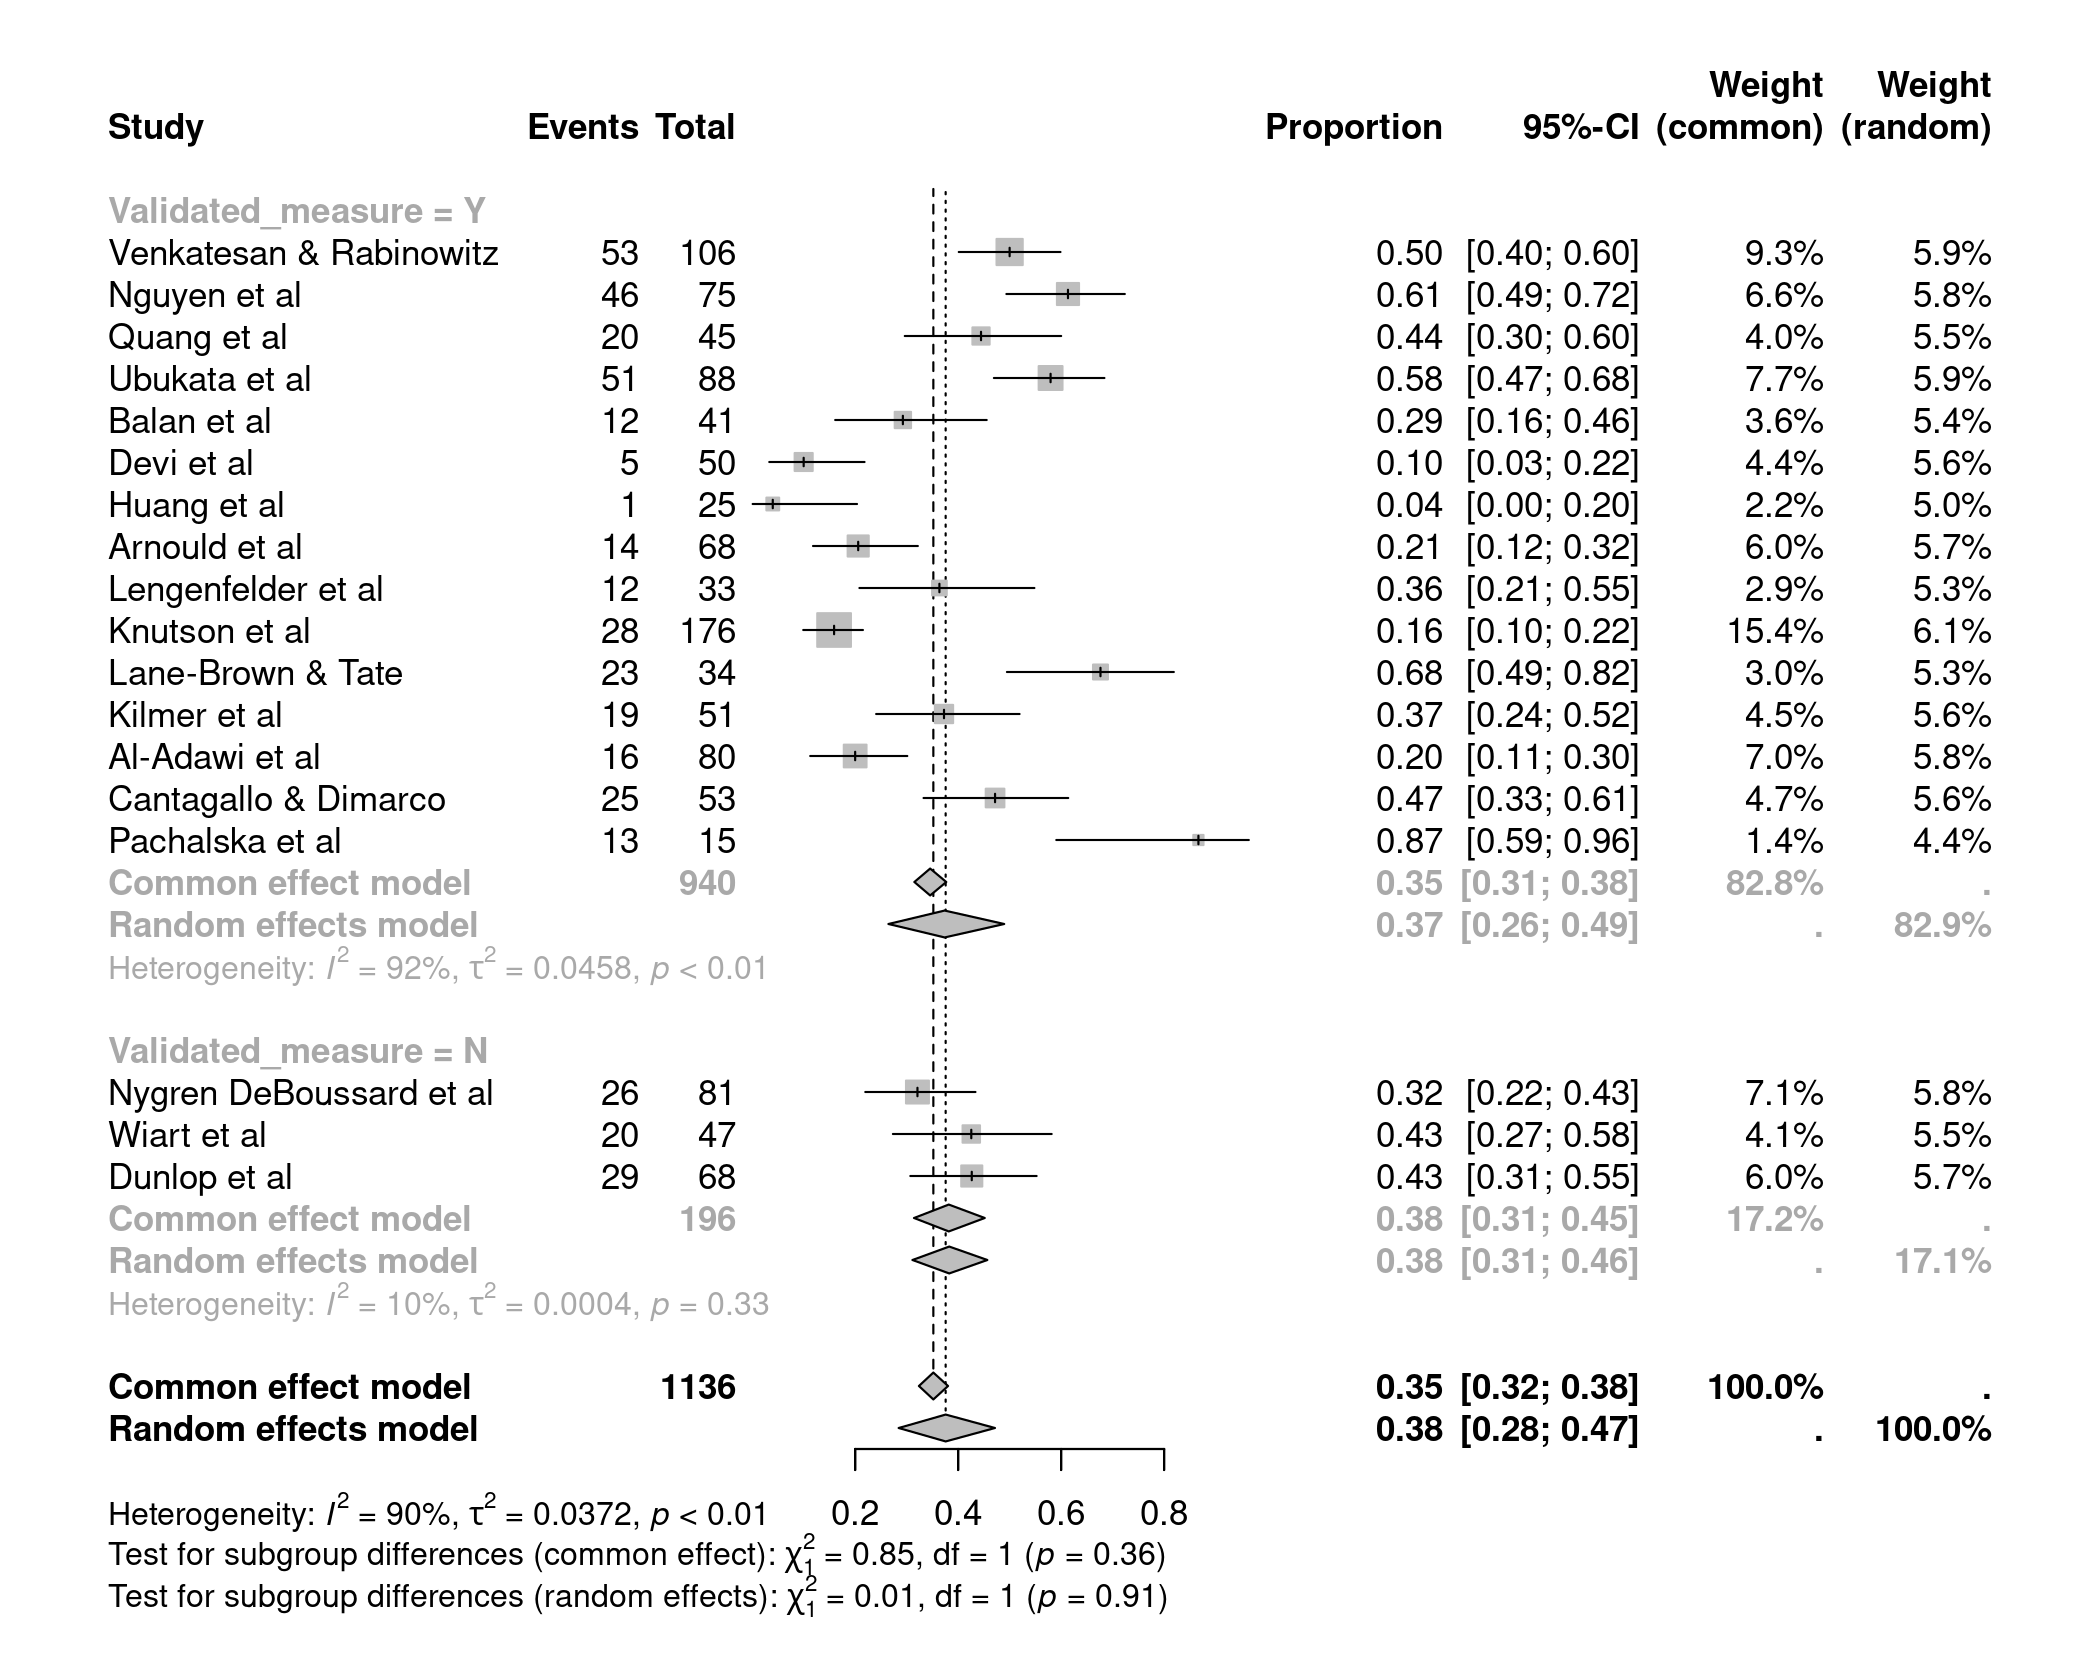

In [42]:
# Validated measure 
validated_measure_meta <- metaprop(Apathy_N, Total_N,
                                   studlab = Authors,
                                   subgroup = Validated_measure,  
                                   sm = "PFT",                   
                                   method.tau = "DL",             
                                   method.cs = "WS",              
                                   data = main_df)

options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 210)
forest(validated_measure_meta)

Continent

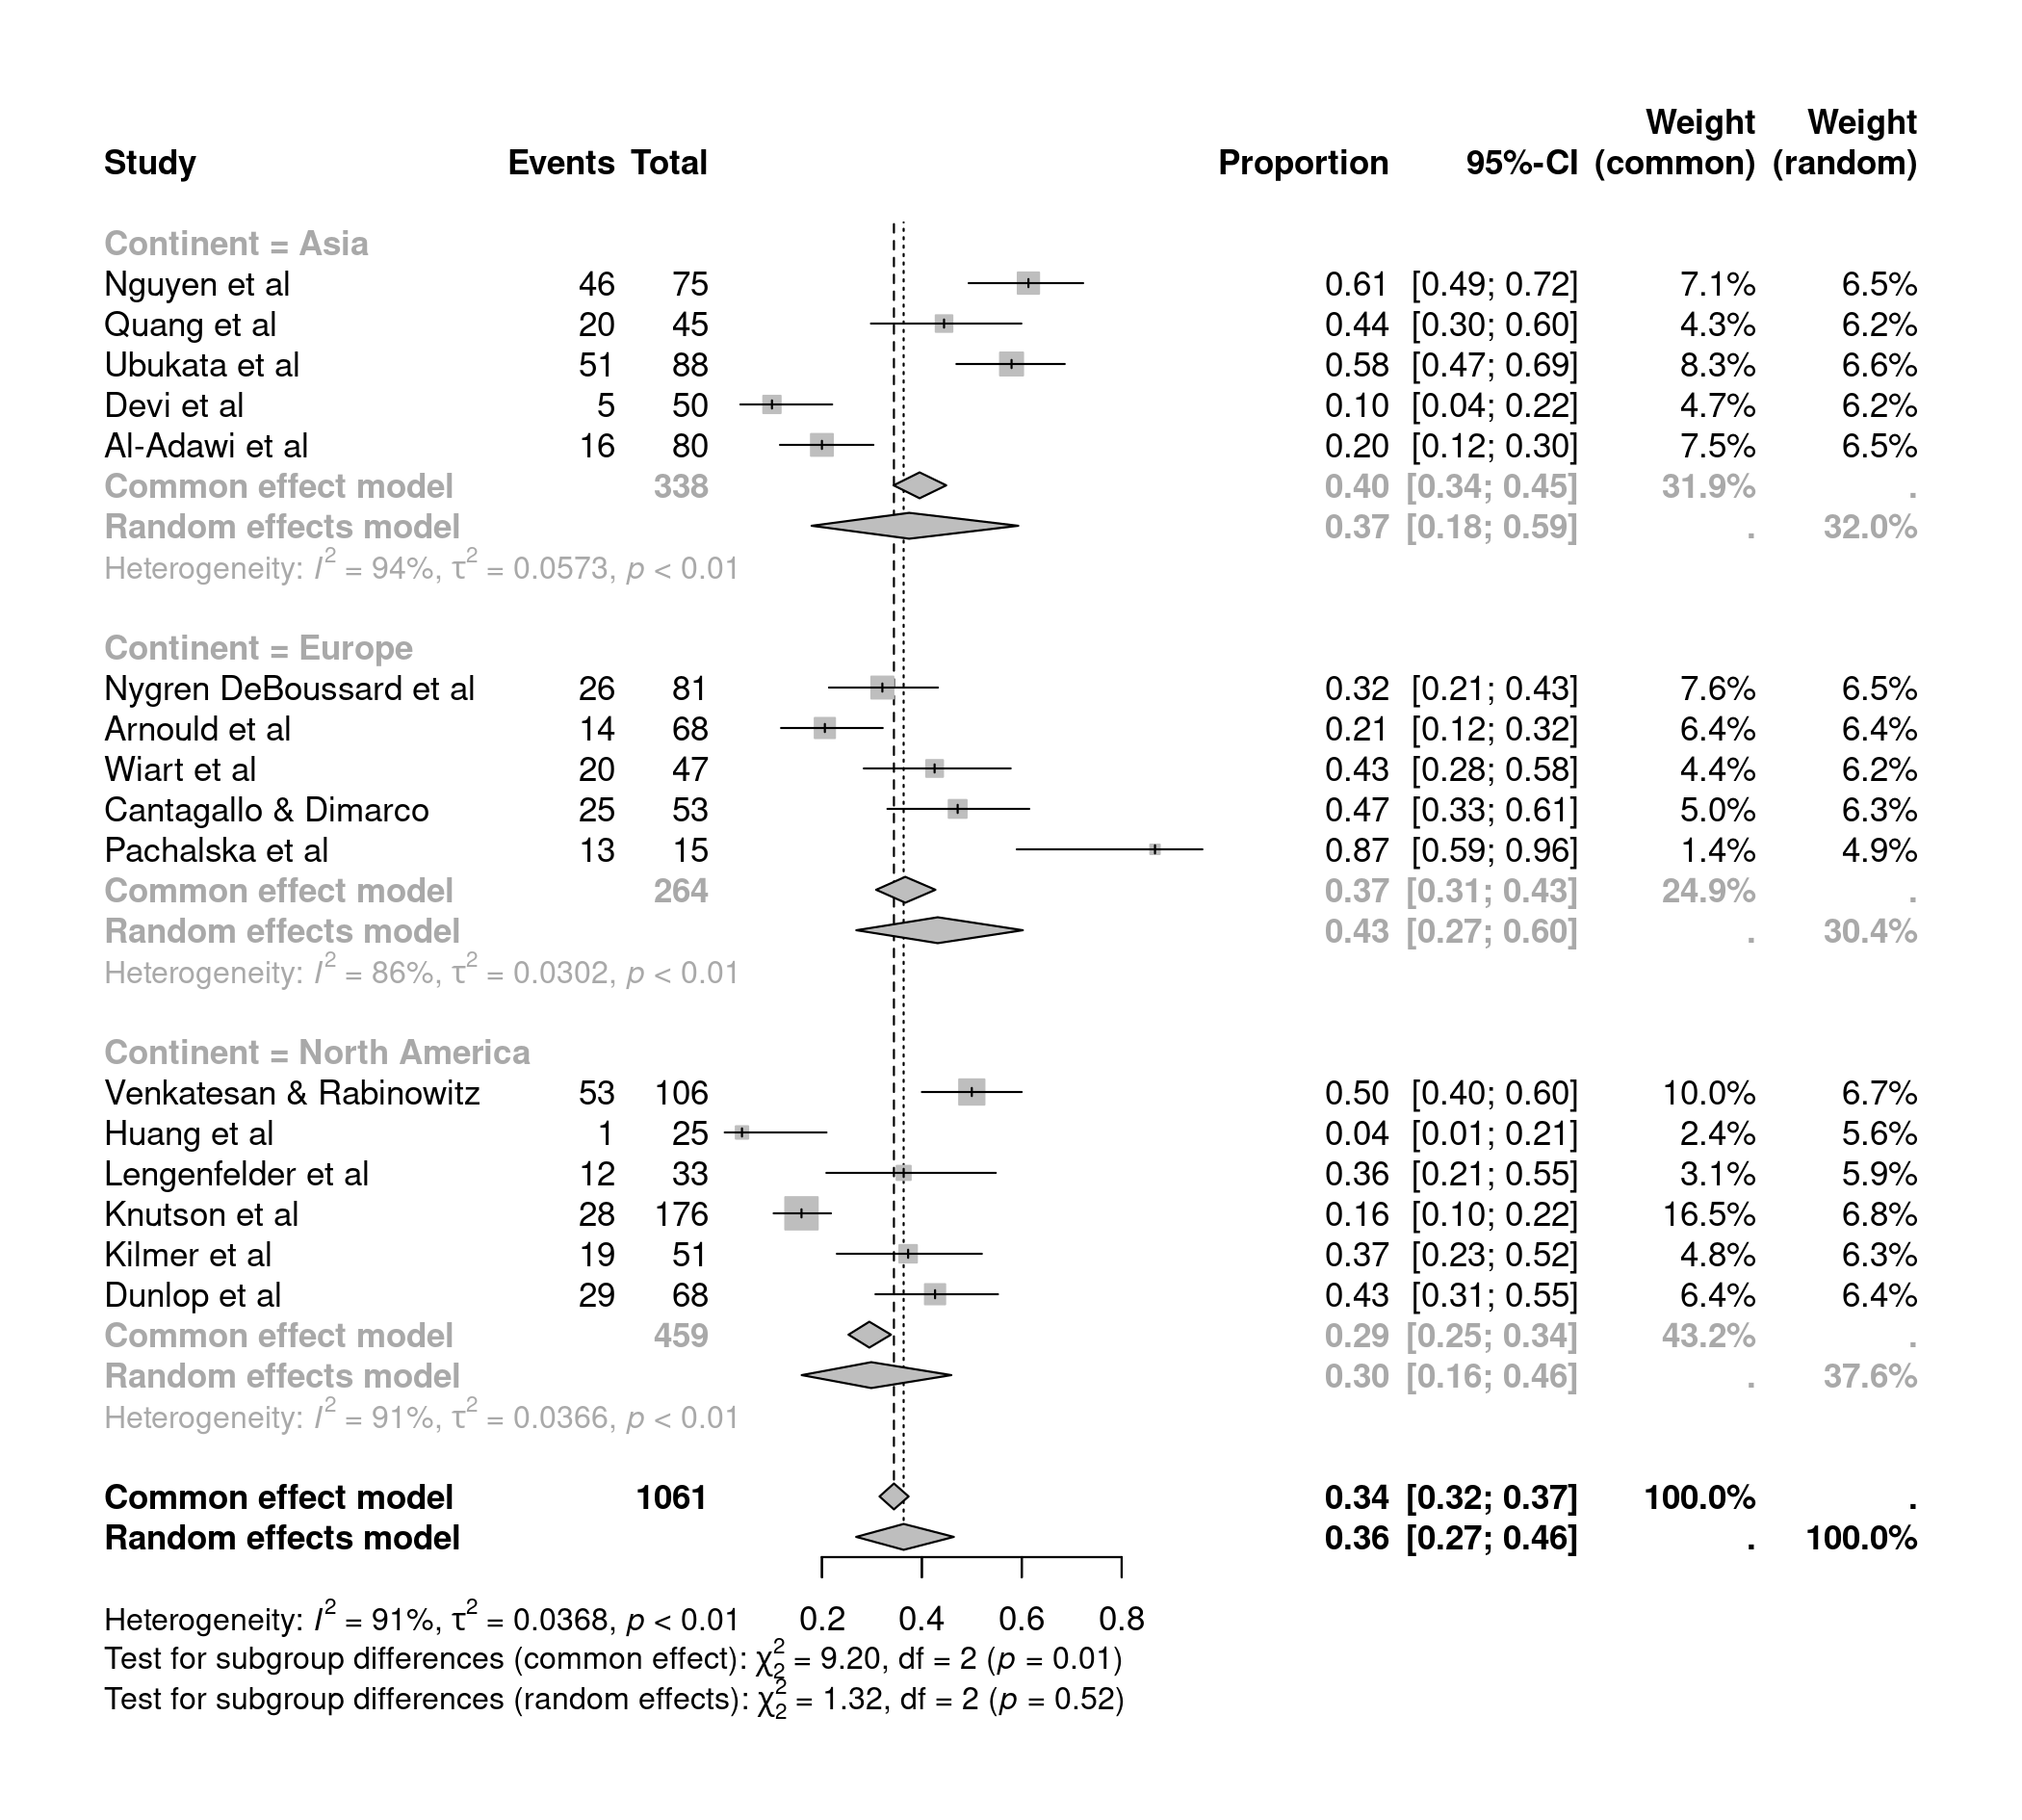

In [12]:
continent_counts <- table(main_df$Continent)
valid_continents <- names(continent_counts[continent_counts > 1])

# Subset the dataset to include only those continents with more than 1 study
filtered_df <- main_df[main_df$Continent %in% valid_continents, ]

# Run the meta-analysis for the filtered dataset
continent_meta <- metaprop(Apathy_N, Total_N,
                           studlab = Authors,
                           subgroup = Continent,  
                           sm = "PFT",          
                           method.tau = "DL",   
                           method.cs = "WS",    
                           data = filtered_df)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 210)
forest(continent_meta)

Country

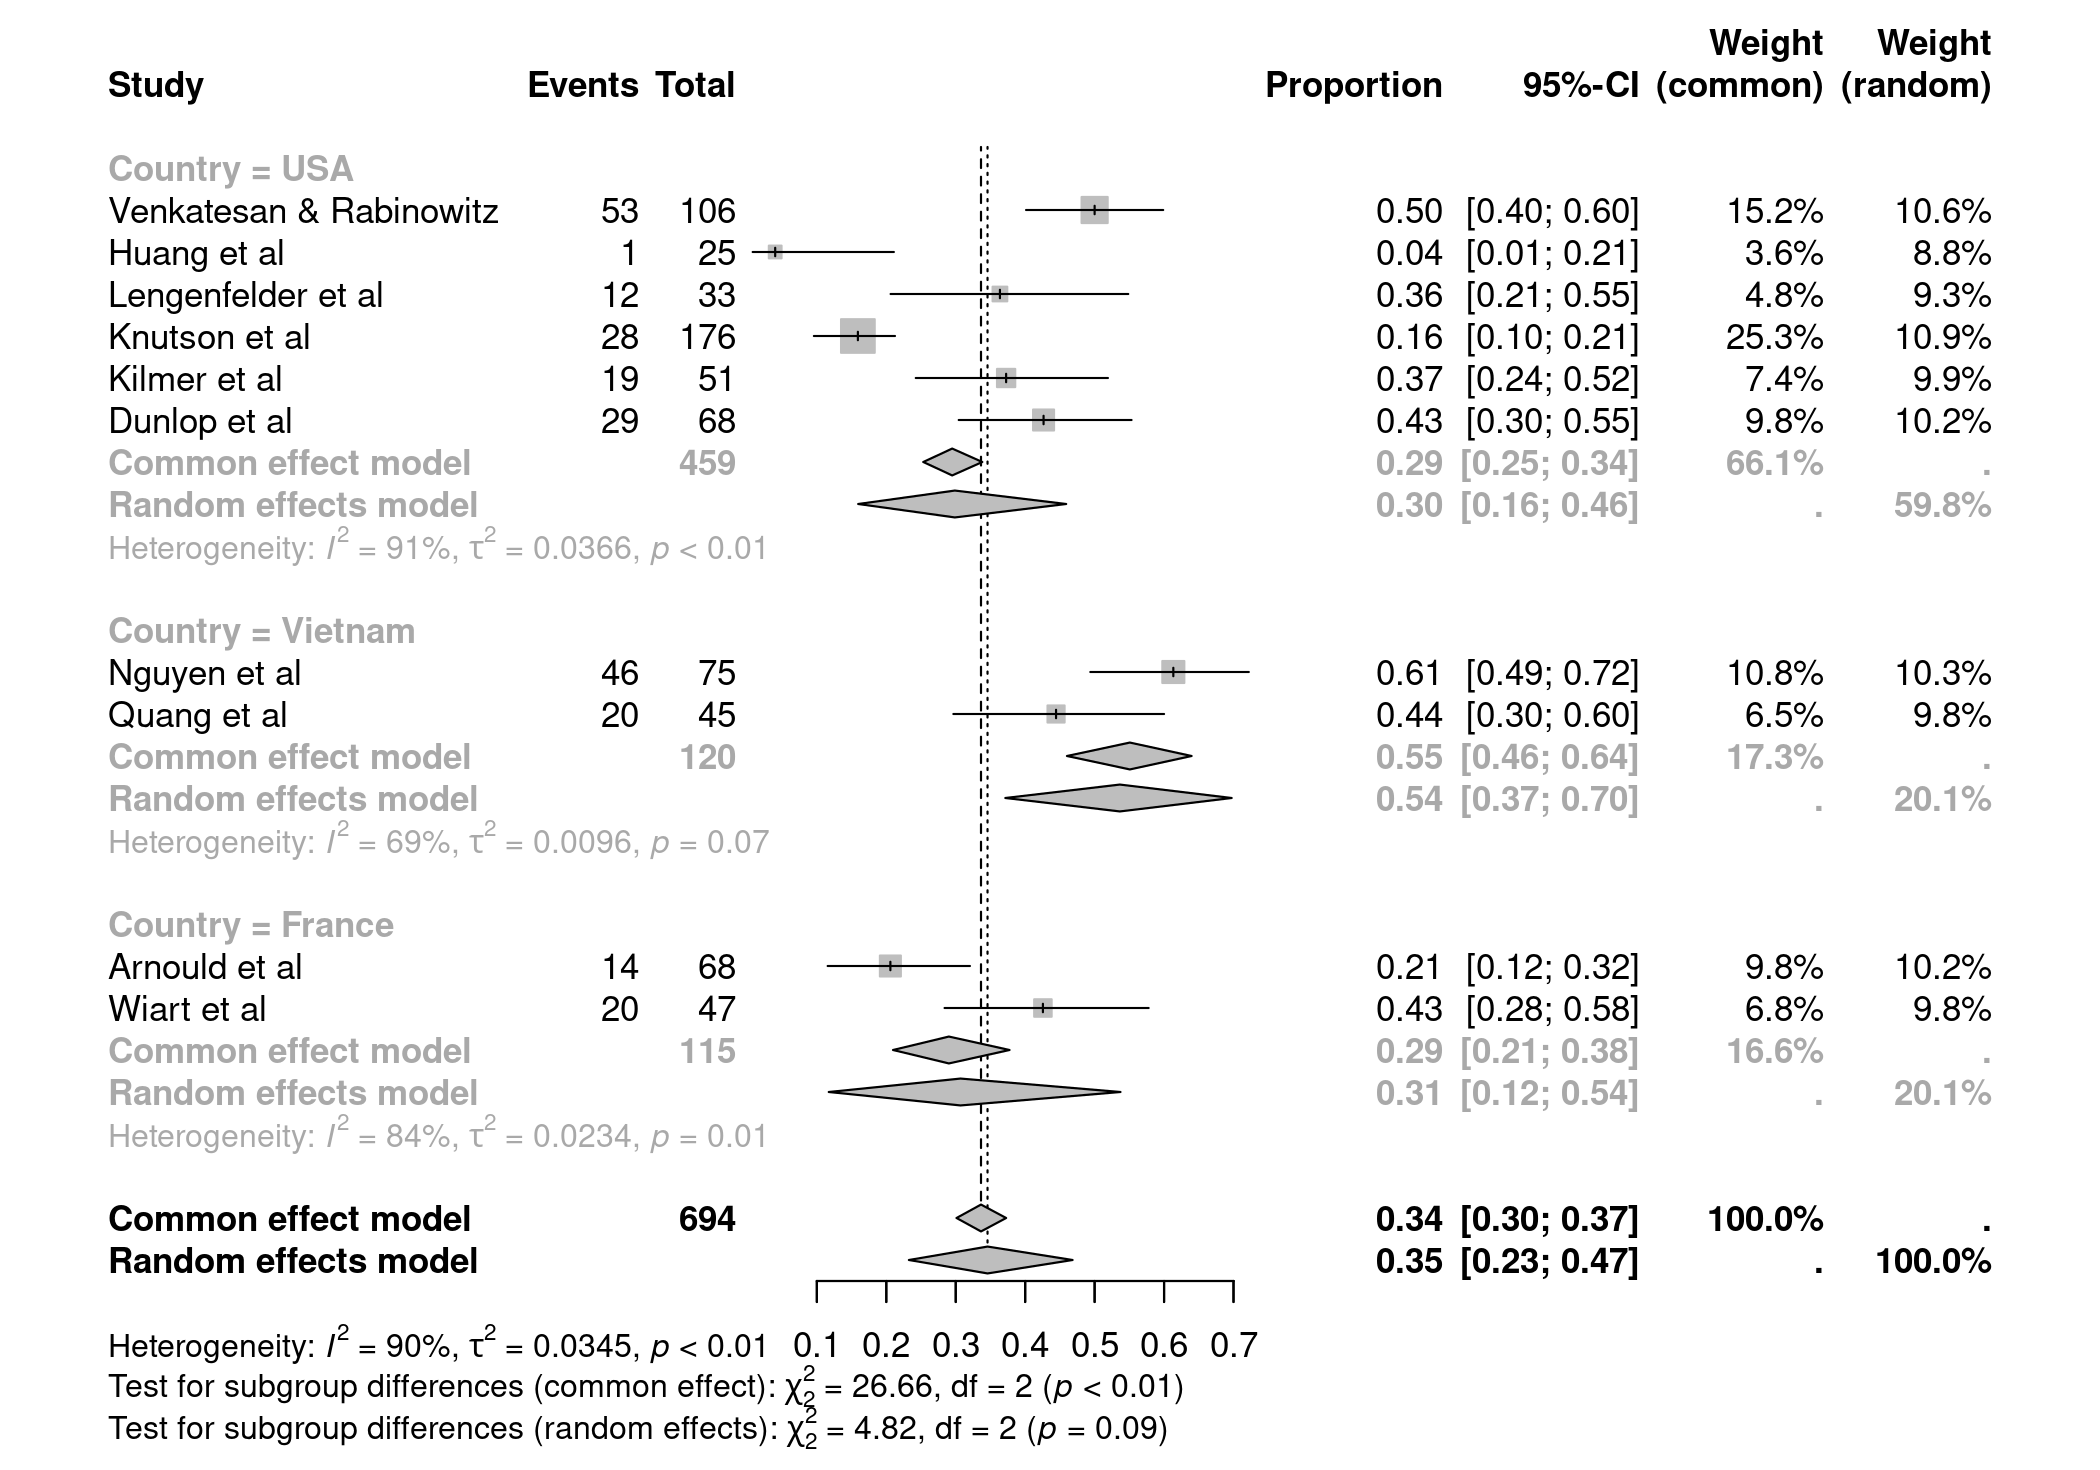

In [13]:
# Summarize the count of studies per country
country_counts <- table(main_df$Country)

# Identify countries with more than 1 study
valid_countries <- names(country_counts[country_counts > 1])

# Subset the dataset to include only those countries with more than 1 study
filtered_df <- main_df[main_df$Country %in% valid_countries, ]

# Run the meta-analysis for the filtered dataset
country_meta <- metaprop(Apathy_N, Total_N,
                         studlab = Authors,
                         subgroup = Country,  
                         sm = "PFT",          
                         method.tau = "DL",   
                         method.cs = "WS",    
                         data = filtered_df)

options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 210)
forest(country_meta)

Rater

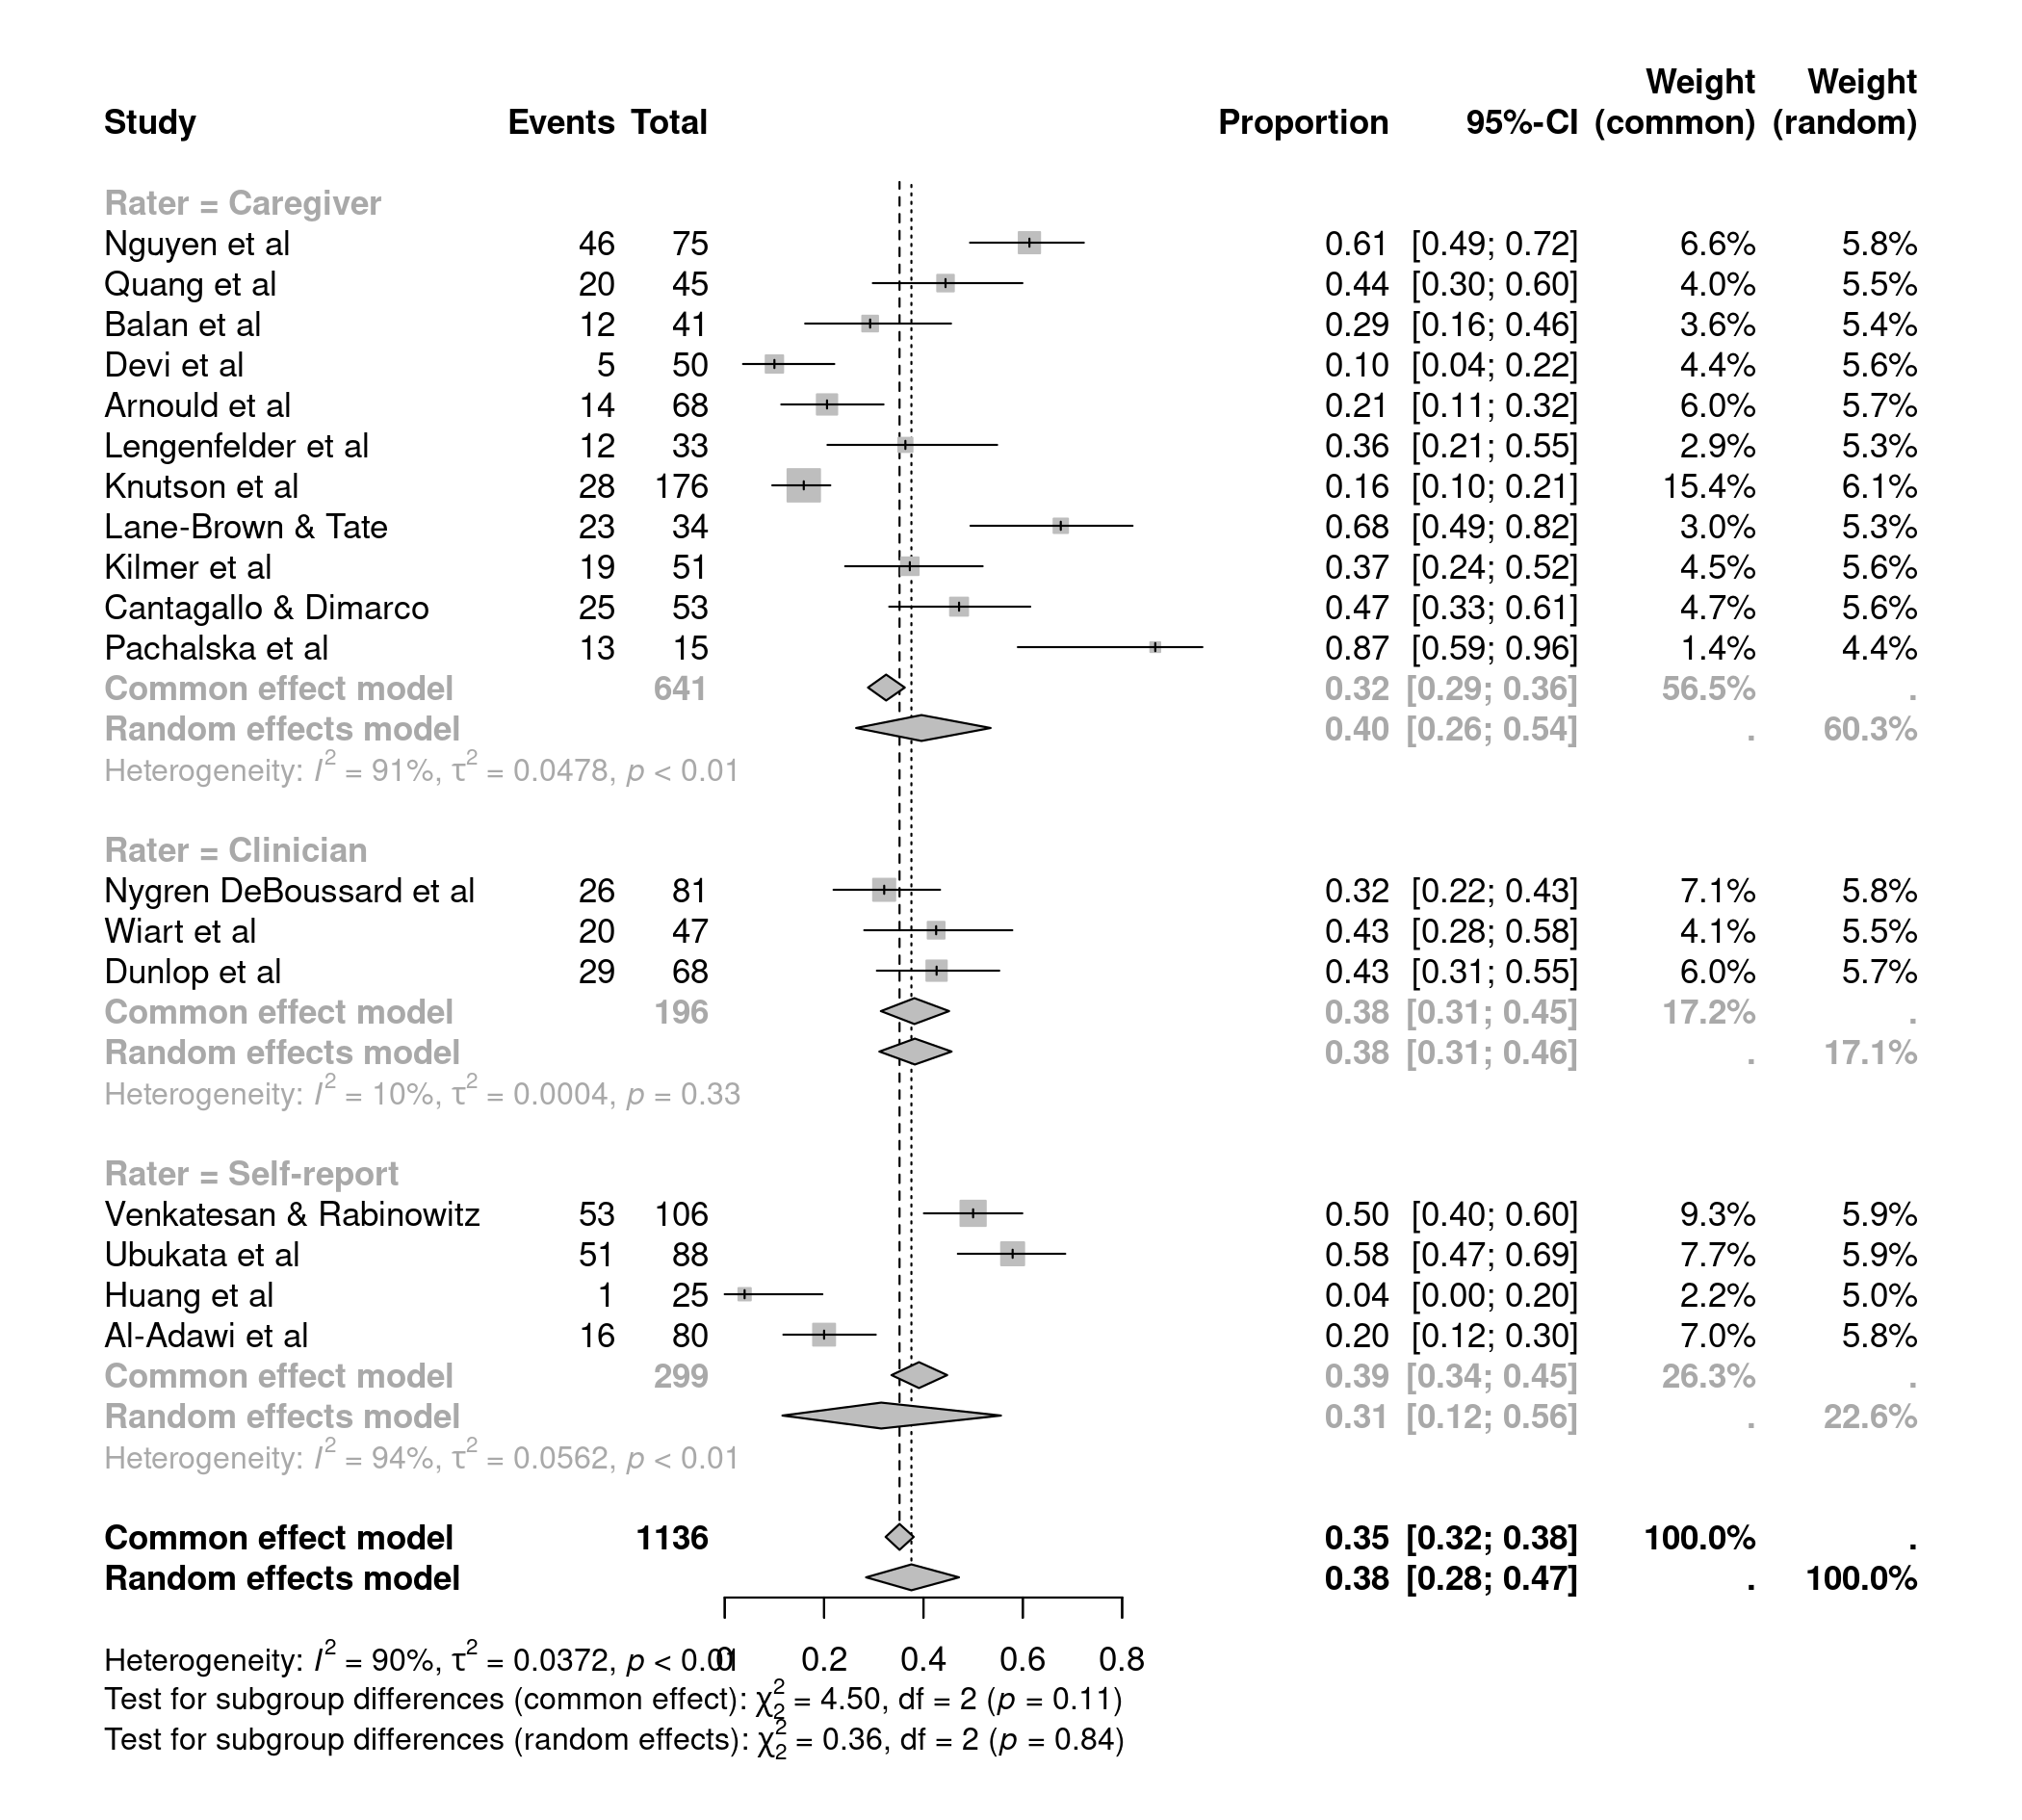

In [14]:
## Rater
main_df <- main_df %>%
  filter(!is.na(Rater))

# Meta-analysis for the 'Rater' subgroup
rater_meta <- metaprop(Apathy_N, Total_N,
                       studlab = Authors,
                       subgroup = Rater,  
                       sm = "PFT",          
                       method.tau = "DL",   
                       method.cs = "WS",    
                       data = main_df)

options(repr.plot.width = 10, repr.plot.height = 9, repr.plot.res = 210)
forest(rater_meta)

### Meta-regressions

Age

In [15]:
age_meta_reg <- metareg(apathy_meta, ~ Mean_age)
summary(age_meta_reg)

Warning message:
“1 study with NAs omitted from model fitting.”



Mixed-Effects Model (k = 17; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  1.3118   57.4694    3.3764    5.8761    5.2226   

tau^2 (estimated amount of residual heterogeneity):     0.0453 (SE = 0.0200)
tau (square root of estimated tau^2 value):             0.2129
I^2 (residual heterogeneity / unaccounted variability): 91.27%
H^2 (unaccounted variability / sampling variability):   11.46
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 15) = 171.9115, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.0076, p-val = 0.9303

Model Results:

          estimate      se    zval    pval    ci.lb   ci.ub     
intrcpt     0.6474  0.2279  2.8404  0.0045   0.2007  1.0941  ** 
Mean_age    0.0005  0.0058  0.0875  0.9303  -0.0109  0.0119     

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Gender balance (proportion of males)

In [16]:
gender_meta_reg <- metareg(apathy_meta, ~ Gender_males)
summary(gender_meta_reg)

Warning message:
“2 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 16; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.9231   51.1869    0.1538    2.4716    2.1538   

tau^2 (estimated amount of residual heterogeneity):     0.0378 (SE = 0.0169)
tau (square root of estimated tau^2 value):             0.1943
I^2 (residual heterogeneity / unaccounted variability): 90.03%
H^2 (unaccounted variability / sampling variability):   10.03
R^2 (amount of heterogeneity accounted for):            10.56%

Test for Residual Heterogeneity:
QE(df = 14) = 140.4413, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 4.5378, p-val = 0.0332

Model Results:

              estimate      se     zval    pval    ci.lb    ci.ub      
intrcpt         1.3873  0.3421   4.0557  <.0001   0.7169   2.0577  *** 
Gender_males   -0.9030  0.4239  -2.1302  0.0332  -1.7338  -0.0722    * 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Length of time since injury

In [17]:
months_since_injury_meta_reg <- metareg(apathy_meta, Length_of_time_since_TBI)
summary(months_since_injury_meta_reg)

Warning message:
“1 study with NAs omitted from model fitting.”



Mixed-Effects Model (k = 17; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.9646   53.3911    0.0708    2.5705    1.9170   

tau^2 (estimated amount of residual heterogeneity):     0.0284 (SE = 0.0126)
tau (square root of estimated tau^2 value):             0.1684
I^2 (residual heterogeneity / unaccounted variability): 86.19%
H^2 (unaccounted variability / sampling variability):   7.24
R^2 (amount of heterogeneity accounted for):            12.23%

Test for Residual Heterogeneity:
QE(df = 15) = 108.5813, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 2.2873, p-val = 0.1304

Model Results:

                          estimate      se    zval    pval    ci.lb   ci.ub 
intrcpt                     0.6101  0.0632  9.6483  <.0001   0.4861  0.7340 
Length_of_time_since_TBI    0.0015  0.0010  1.5124  0.1304  -0.0005  0.0036 
                              
intrcpt                   *** 
Length_of_time_since_TBI      

---
Signif. codes:  0 ‘***’ 0

Year of publication

In [18]:
year_meta_reg <- metareg(apathy_meta, ~ Year)
summary(year_meta_reg)


Mixed-Effects Model (k = 18; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.2381   59.5658    1.5237    4.1948    3.2380   

tau^2 (estimated amount of residual heterogeneity):     0.0399 (SE = 0.0173)
tau (square root of estimated tau^2 value):             0.1998
I^2 (residual heterogeneity / unaccounted variability): 90.82%
H^2 (unaccounted variability / sampling variability):   10.90
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 16) = 174.3790, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.6279, p-val = 0.4281

Model Results:

         estimate       se     zval    pval     ci.lb    ci.ub    
intrcpt    9.4485  11.0878   0.8522  0.3941  -12.2832  31.1802    
Year      -0.0044   0.0055  -0.7924  0.4281   -0.0152   0.0064    

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Proportion mild TBI cases

In [19]:
severity_mild_meta_reg <- metareg(apathy_meta, Mild) 
summary(severity_mild_meta_reg)

Warning message:
“3 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 15; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  5.2303   42.7952   -4.4605   -2.3364   -2.2787   

tau^2 (estimated amount of residual heterogeneity):     0.0299 (SE = 0.0139)
tau (square root of estimated tau^2 value):             0.1730
I^2 (residual heterogeneity / unaccounted variability): 87.79%
H^2 (unaccounted variability / sampling variability):   8.19
R^2 (amount of heterogeneity accounted for):            5.16%

Test for Residual Heterogeneity:
QE(df = 13) = 106.4614, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 3.9265, p-val = 0.0475

Model Results:

         estimate      se     zval    pval    ci.lb    ci.ub      
intrcpt    0.6989  0.0538  12.9918  <.0001   0.5934   0.8043  *** 
Mild      -0.4021  0.2029  -1.9815  0.0475  -0.7998  -0.0044    * 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Proportion moderate-severe cases

In [20]:
severity_moderate_severe_meta_reg <- metareg(apathy_meta, Moderate_severe) 
summary(severity_moderate_severe_meta_reg)

Warning message:
“3 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 15; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  3.5397   46.1763   -1.0795    1.0447    1.1023   

tau^2 (estimated amount of residual heterogeneity):     0.0325 (SE = 0.0152)
tau (square root of estimated tau^2 value):             0.1803
I^2 (residual heterogeneity / unaccounted variability): 88.44%
H^2 (unaccounted variability / sampling variability):   8.65
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 13) = 112.4363, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.5226, p-val = 0.4698

Model Results:

                 estimate      se    zval    pval    ci.lb   ci.ub      
intrcpt            0.6204  0.0655  9.4738  <.0001   0.4920  0.7487  *** 
Moderate_severe    0.0960  0.1328  0.7229  0.4698  -0.1643  0.3564      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Proportion severe cases

In [21]:
severity_severe_meta_reg <- metareg(apathy_meta, Severe)
summary(severity_severe_meta_reg)

Warning message:
“3 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 15; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  3.5278   46.2002   -1.0556    1.0686    1.1262   

tau^2 (estimated amount of residual heterogeneity):     0.0338 (SE = 0.0157)
tau (square root of estimated tau^2 value):             0.1839
I^2 (residual heterogeneity / unaccounted variability): 88.83%
H^2 (unaccounted variability / sampling variability):   8.95
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 13) = 116.3468, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.5141, p-val = 0.4734

Model Results:

         estimate      se    zval    pval    ci.lb   ci.ub      
intrcpt    0.6013  0.0858  7.0072  <.0001   0.4331  0.7695  *** 
Severe     0.0976  0.1361  0.7170  0.4734  -0.1691  0.3643      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Proportion of transport-related TBI

In [22]:
cause_transport_meta_reg <- metareg(apathy_meta, Cause_of_TBI_transport_accident)
summary(cause_transport_meta_reg)

Warning message:
“7 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 11; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.8447   34.6265    0.3106    1.5043    3.7392   

tau^2 (estimated amount of residual heterogeneity):     0.0353 (SE = 0.0192)
tau (square root of estimated tau^2 value):             0.1880
I^2 (residual heterogeneity / unaccounted variability): 89.56%
H^2 (unaccounted variability / sampling variability):   9.58
R^2 (amount of heterogeneity accounted for):            26.02%

Test for Residual Heterogeneity:
QE(df = 9) = 86.2140, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 4.8366, p-val = 0.0279

Model Results:

                                 estimate      se    zval    pval   ci.lb 
intrcpt                            0.3494  0.1353  2.5832  0.0098  0.0843 
Cause_of_TBI_transport_accident    0.4167  0.1895  2.1992  0.0279  0.0453 
                                  ci.ub     
intrcpt                          0.6146  ** 
Cause_of_TBI_transport_accident  0.7880  

Proportion of fall-related TBI

In [23]:
cause_fall_meta_reg <- metareg(apathy_meta, Cause_of_TBI_fall)
summary(cause_fall_meta_reg)

Warning message:
“7 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 11; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.5518   39.2123    4.8964    6.0901    8.3250   

tau^2 (estimated amount of residual heterogeneity):     0.0559 (SE = 0.0300)
tau (square root of estimated tau^2 value):             0.2365
I^2 (residual heterogeneity / unaccounted variability): 93.43%
H^2 (unaccounted variability / sampling variability):   15.22
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 9) = 136.9973, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.0133, p-val = 0.9082

Model Results:

                   estimate      se    zval    pval    ci.lb   ci.ub      
intrcpt              0.6035  0.1271  4.7495  <.0001   0.3545  0.8526  *** 
Cause_of_TBI_fall    0.1253  1.0871  0.1153  0.9082  -2.0054  2.2560      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Proportion of assault-related TBI

In [24]:
cause_assault_meta_reg <- metareg(apathy_meta, Cause_of_TBI_assault)
summary(cause_assault_meta_reg)

Warning message:
“9 studies with NAs omitted from model fitting.”



Mixed-Effects Model (k = 9; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  0.6515   31.0448    4.6970    5.2887    9.4970   

tau^2 (estimated amount of residual heterogeneity):     0.0531 (SE = 0.0336)
tau (square root of estimated tau^2 value):             0.2304
I^2 (residual heterogeneity / unaccounted variability): 92.72%
H^2 (unaccounted variability / sampling variability):   13.74
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 7) = 96.1703, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.7177, p-val = 0.3969

Model Results:

                      estimate      se    zval    pval    ci.lb   ci.ub      
intrcpt                 0.5452  0.1059  5.1503  <.0001   0.3377  0.7527  *** 
Cause_of_TBI_assault    1.1501  1.3575  0.8472  0.3969  -1.5107  3.8108      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Relationship with study risk of bias rating

In [25]:
Study_quality_meta_reg <- metareg(apathy_meta, Study_quality_score)
summary(Study_quality_meta_reg)


Mixed-Effects Model (k = 18; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc   
  2.0614   59.9193    1.8772    4.5484    3.5915   

tau^2 (estimated amount of residual heterogeneity):     0.0397 (SE = 0.0170)
tau (square root of estimated tau^2 value):             0.1991
I^2 (residual heterogeneity / unaccounted variability): 90.67%
H^2 (unaccounted variability / sampling variability):   10.72
R^2 (amount of heterogeneity accounted for):            0.00%

Test for Residual Heterogeneity:
QE(df = 16) = 171.5296, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 0.2738, p-val = 0.6008

Model Results:

                     estimate      se     zval    pval    ci.lb   ci.ub     
intrcpt                0.7858  0.2404   3.2683  0.0011   0.3146  1.2570  ** 
Study_quality_score   -0.0143  0.0273  -0.5233  0.6008  -0.0677  0.0392     

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Robustness and sensitivity analyses

#### Publication bias

Funnel plot

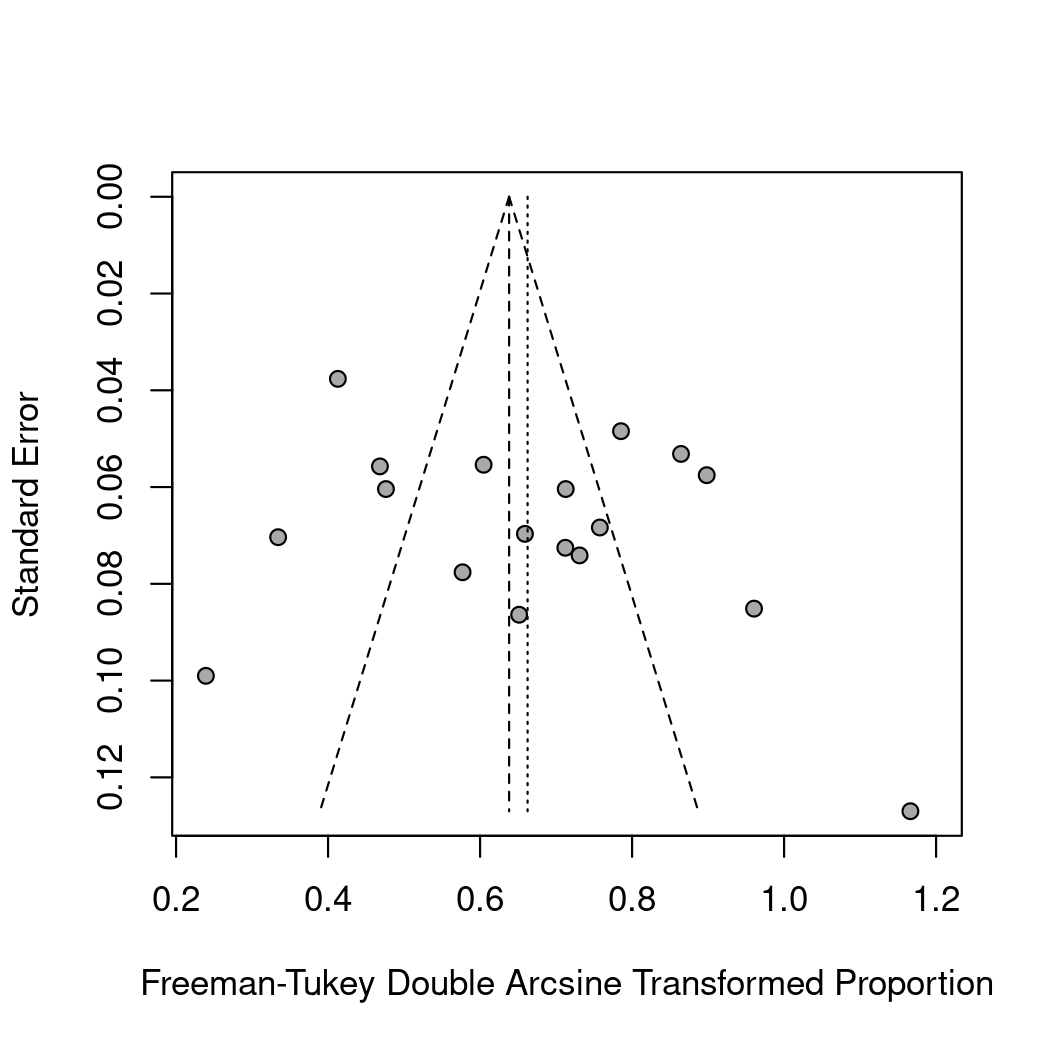

In [38]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 210)
funnel(apathy_meta)

Egger's test

In [27]:
metabias(apathy_meta, method.bias="linreg")

Linear regression test of funnel plot asymmetry

Test result: t = 1.13, df = 16, p-value = 0.2742
Bias estimate: 3.2505 (SE = 2.8710)

Details:
- multiplicative residual heterogeneity variance (tau^2 = 10.1195)
- predictor: standard error
- weight:    inverse variance
- reference: Egger et al. (1997), BMJ

Outliers

In [28]:
dmetar::find.outliers(apathy_meta)

Identified outliers (fixed-effect model) 
---------------------------------------- 
"Venkatesan & Rabinowitz ", "Nguyen et al ", "Ubukata et al ", "Devi et al ", "Huang et al ", "Arnould et al ", "Knutson et al ", "Lane-Brown & Tate ", "Al-Adawi et al ", "Pachalska et al " 
 
Results with outliers removed 
----------------------------- 
Number of studies: k = 8
Number of observations: o = 419
Number of events: e = 163

                     proportion           95%-CI
Common effect model      0.3879 [0.3410; 0.4358]
Random effects model     0.3879 [0.3410; 0.4358]

Quantifying heterogeneity:
 tau^2 = 0 [0.0000; 0.0119]; tau = 0 [0.0000; 0.1091]
 I^2 = 0.0% [0.0%; 67.6%]; H = 1.00 [1.00; 1.76]

Test of heterogeneity:
    Q d.f. p-value
 6.02    7  0.5377

Details on meta-analytical method:
- Inverse variance method
- DerSimonian-Laird estimator for tau^2
- Jackson method for confidence interval of tau^2 and tau
- Freeman-Tukey double arcsine transformation

Identified outliers (random-ef

Influence diagnostics

[===========================================================================] DONE 


Leave-One-Out Analysis (Sorted by I2) 
 ----------------------------------- 
                                  Effect  LLCI  ULCI    I2
Omitting Knutson et al             0.678 0.586 0.771 0.879
Omitting Nguyen et al              0.648 0.553 0.743 0.895
Omitting Ubukata et al             0.650 0.554 0.746 0.897
Omitting Devi et al                0.682 0.587 0.776 0.897
Omitting Pachalska et al           0.639 0.546 0.733 0.898
Omitting Huang et al               0.684 0.590 0.778 0.899
Omitting Lane-Brown & Tate         0.646 0.551 0.741 0.900
Omitting Venkatesan & Rabinowitz   0.655 0.555 0.755 0.903
Omitting Al-Adawi et al            0.675 0.576 0.773 0.903
Omitting Arnould et al             0.674 0.575 0.773 0.904
Omitting Cantagallo & Dimarco      0.657 0.558 0.756 0.907
Omitting Quang et al               0.659 0.559 0.758 0.908
Omitting Balan et al               0.668 0.568 0.767 0.908
Omitting Nygren DeBoussard et al   0.666 0.565 0.768 0.908
Omitting Lengenfelder et al        0.6

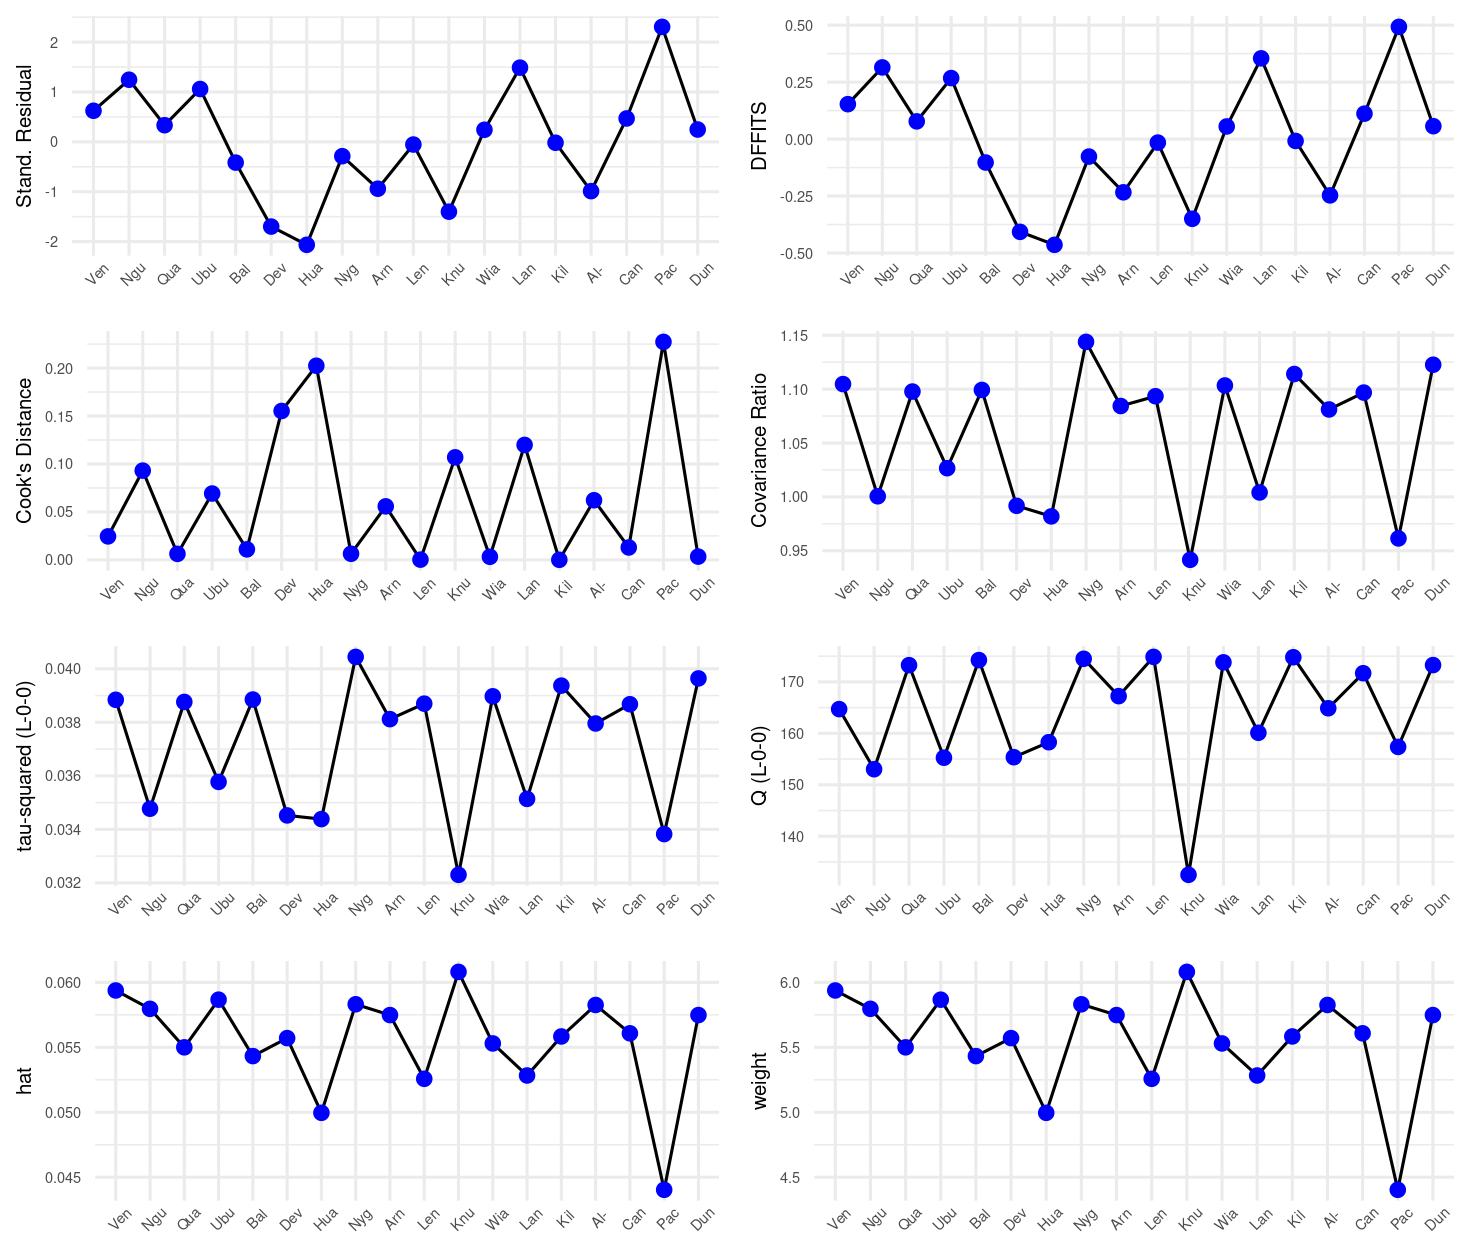

In [29]:
apathy_meta_inf_diagnostics <- dmetar::InfluenceAnalysis(apathy_meta, random = TRUE)
apathy_meta_inf_diagnostics

options(repr.plot.width = 7, repr.plot.height = 6, repr.plot.res = 210)
plot(apathy_meta_inf_diagnostics, "influence")

### Analysis platform details and software versions

In [30]:
version

               _                                          
platform       x86_64-pc-linux-gnu                        
arch           x86_64                                     
os             linux-gnu                                  
system         x86_64, linux-gnu                          
status         Patched                                    
major          4                                          
minor          2.2                                        
year           2022                                       
month          11                                         
day            10                                         
svn rev        83330                                      
language       R                                          
version.string R version 4.2.2 Patched (2022-11-10 r83330)
nickname       Innocent and Trusting                      

In [31]:
packageVersion("dplyr")

[1] ‘1.1.4’

In [32]:
packageVersion("readxl")

[1] ‘1.4.3’

In [33]:
packageVersion("meta")

[1] ‘7.0.0’

In [34]:
packageVersion("dmetar")

[1] ‘0.1.0’

In [35]:
packageVersion("ggplot2")

[1] ‘3.4.4’

In [36]:
packageVersion("metafor")

[1] ‘4.4.0’